#**Dataset**
Download 2 dataset yaitu Natural Disaster dan Economic Damage


*   https://github.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/blob/master/datasets/number-of-natural-disaster-events.csv
*   https://github.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/blob/master/datasets/economic-damage-from-natural-disasters.csv



#**Part 1: SQL Database Setup and Queries**

##**1.1 Database: SQL Query I**

###**1. Import 2 dataset yang sudah didownload ke dalam SQL Database**

* Sebelum import, dibuat terlebih dahulu databasenya dengan cara Open pgAdmin -> Klik kanan pada Servers -> Register -> Server -> Isi data Name di General Tab -> Isi Hostname, Port, Username dan Pasword di Connection Tab -> Klik Save.

Selanjutnya kita buat 2 table (karena ada 2 dataset) dengan mengklik database yang sudah tadi buat -> klik Database -> Schemas -> Table -> Klik kanan pada Table -> Create -> Table -> Isi Name di General Tab -> Tambah beberapa kolom, beri nama dan jenis type data sesuai dataset (untuk economic_damage type datanya bigint karena kalau integer tidak bisa lebih dari 11 digit) -> Klik Save.

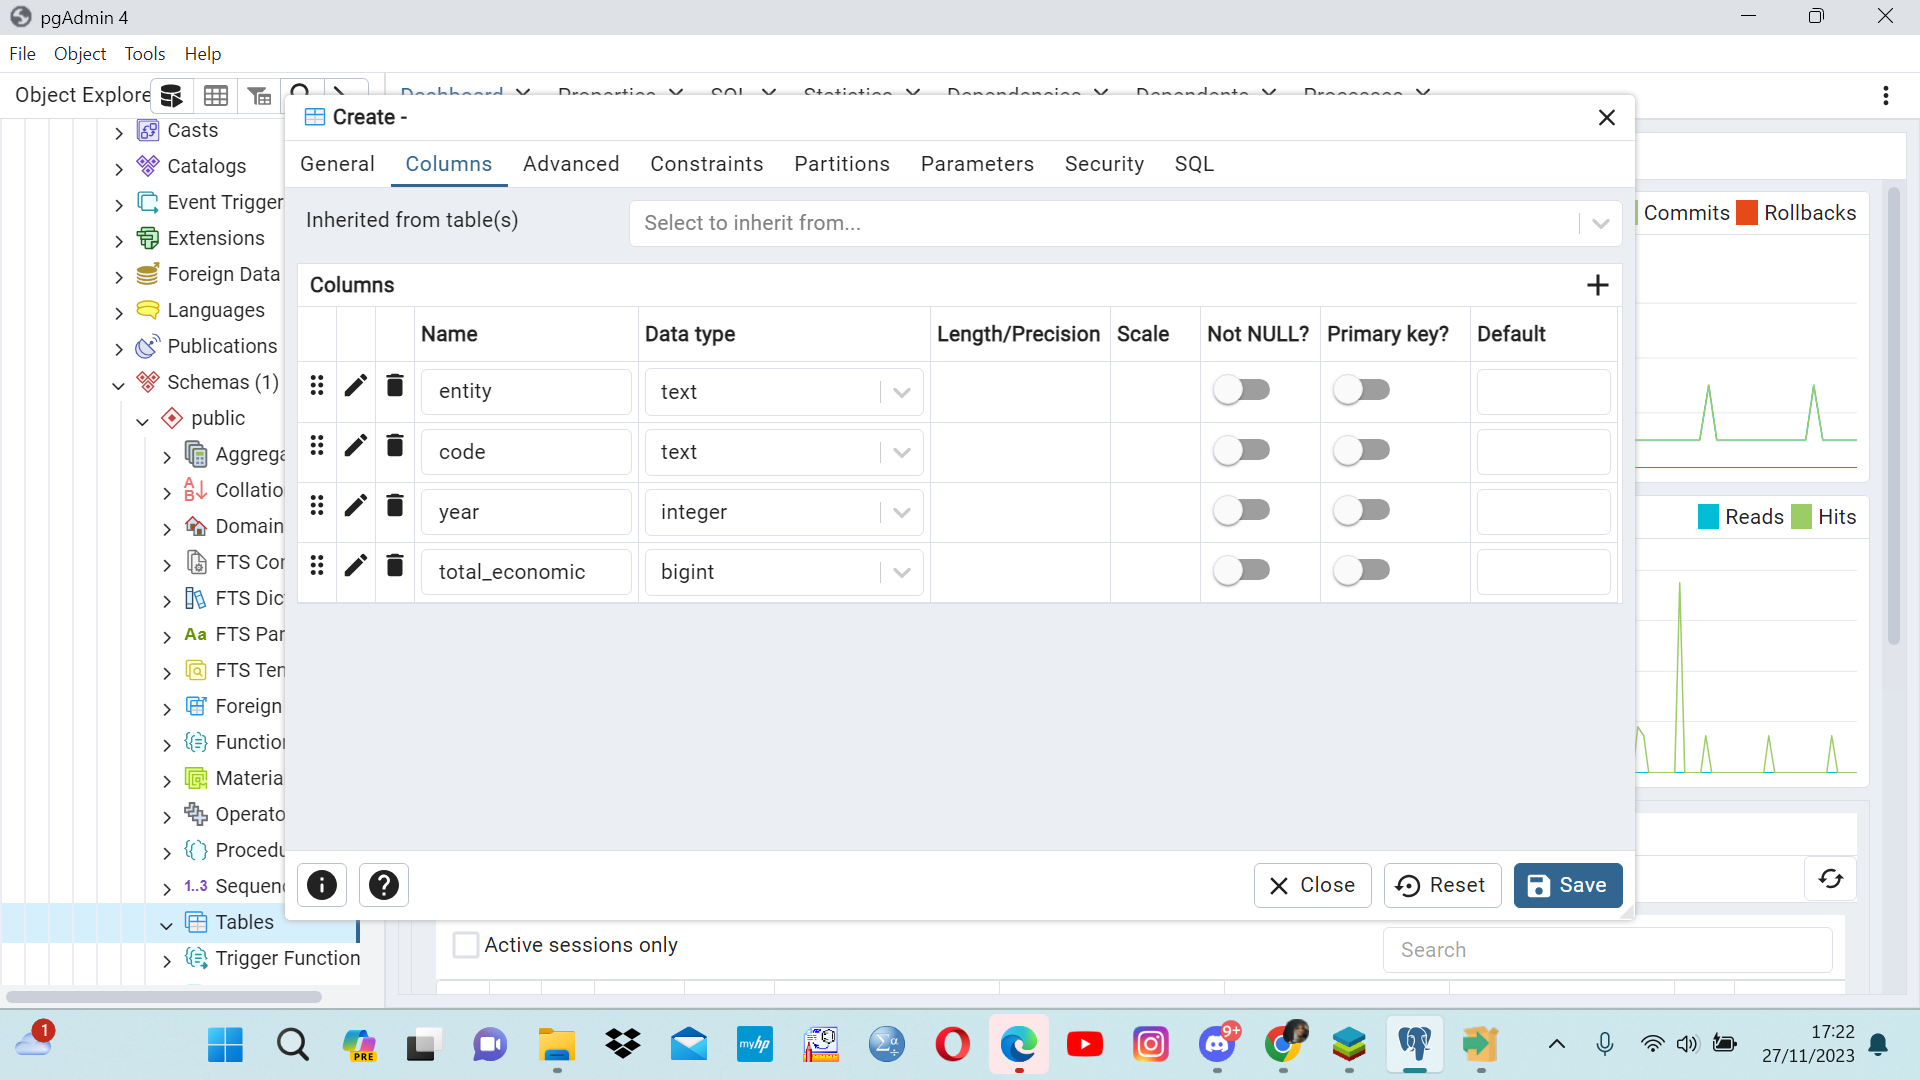

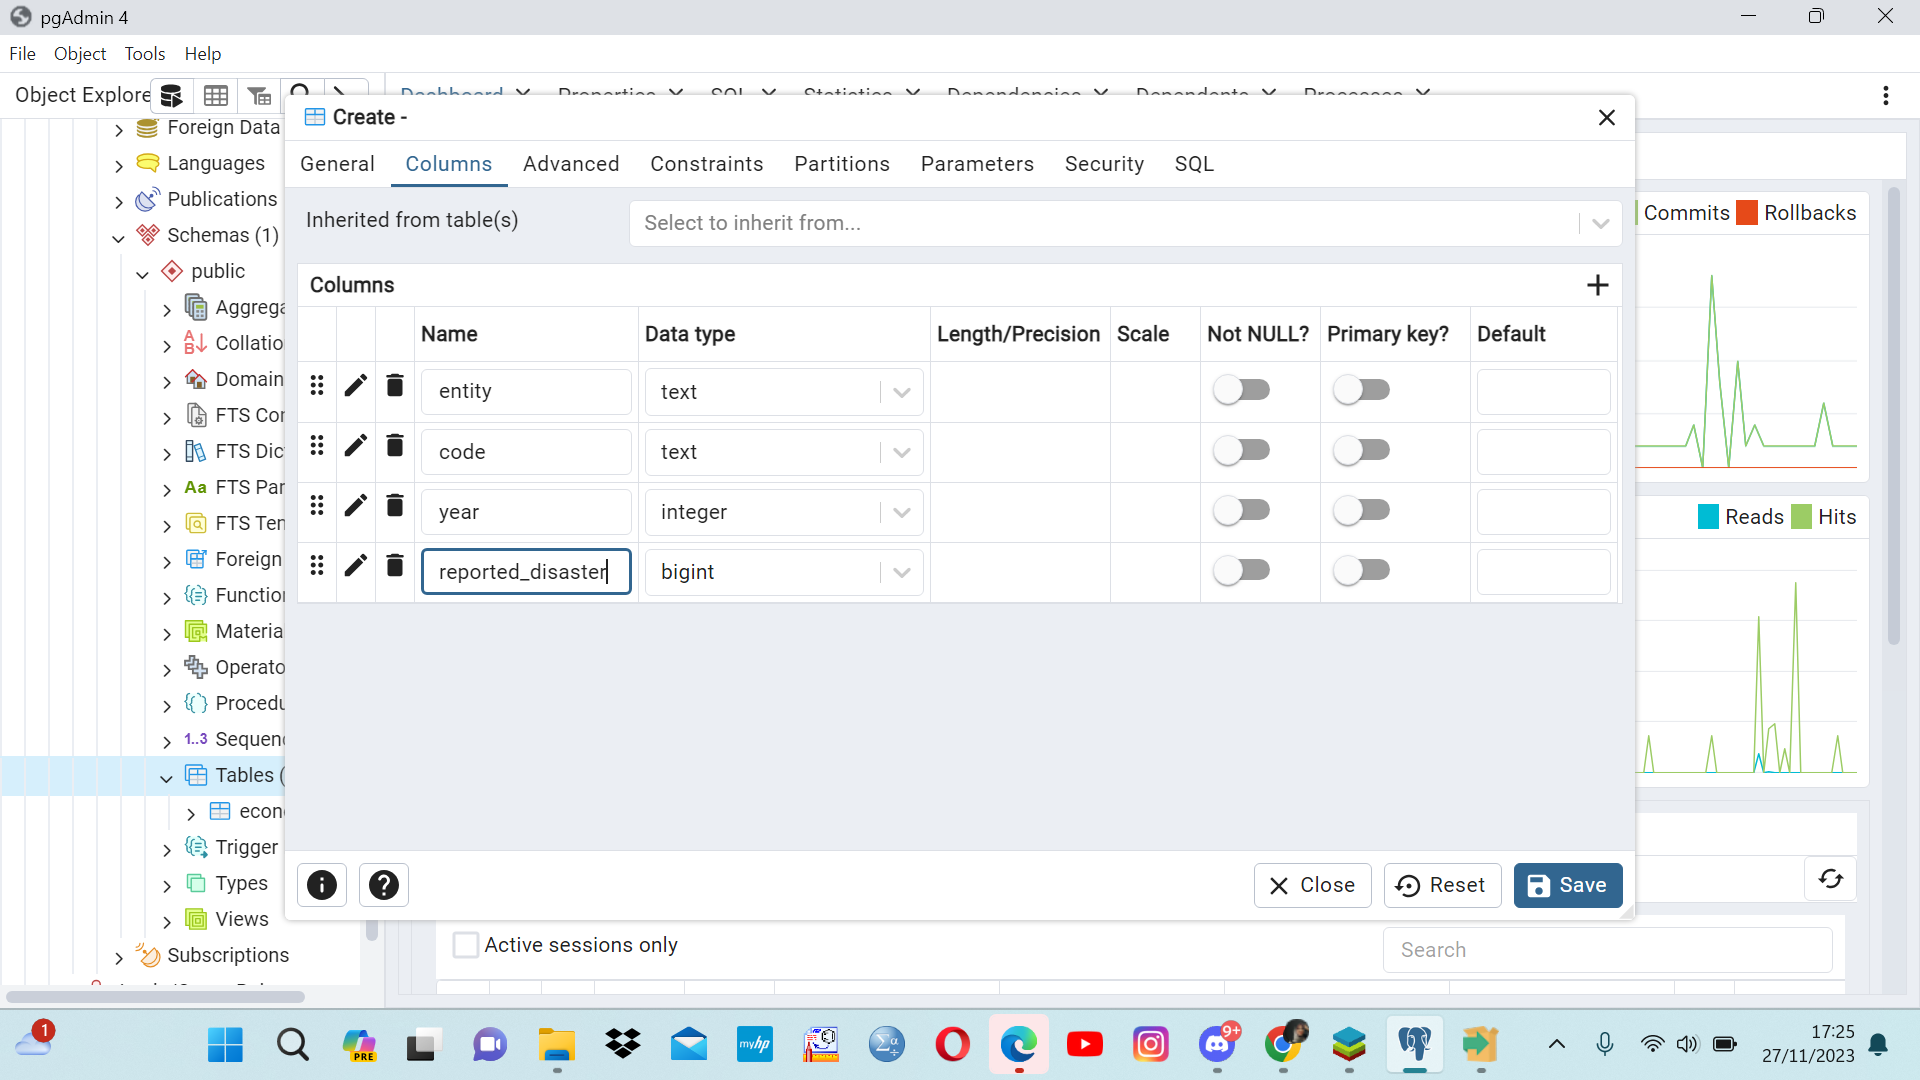

In [ ]:
from IPython.display import Image, display
display(Image('/content/Membuat tabel eco..png'))
display(Image('/content/Tabel reported.png'))

* Import dataset ke dalam table yang telah dibuat (di sini saya memberi nama table tersebut itu **dataset1** dan **dataset2**)sebelumnya dengan Klik kanan table dataset1 -> Import/Export data -> di General Tab - Pilih Import masukan file datasetnya, format CSV dan enconding UTF8 -> Option Tab aktifkan Header -> Klik OK dan muncul Process Completed(Lakukan hal yang sama untuk import ke table dataset2).

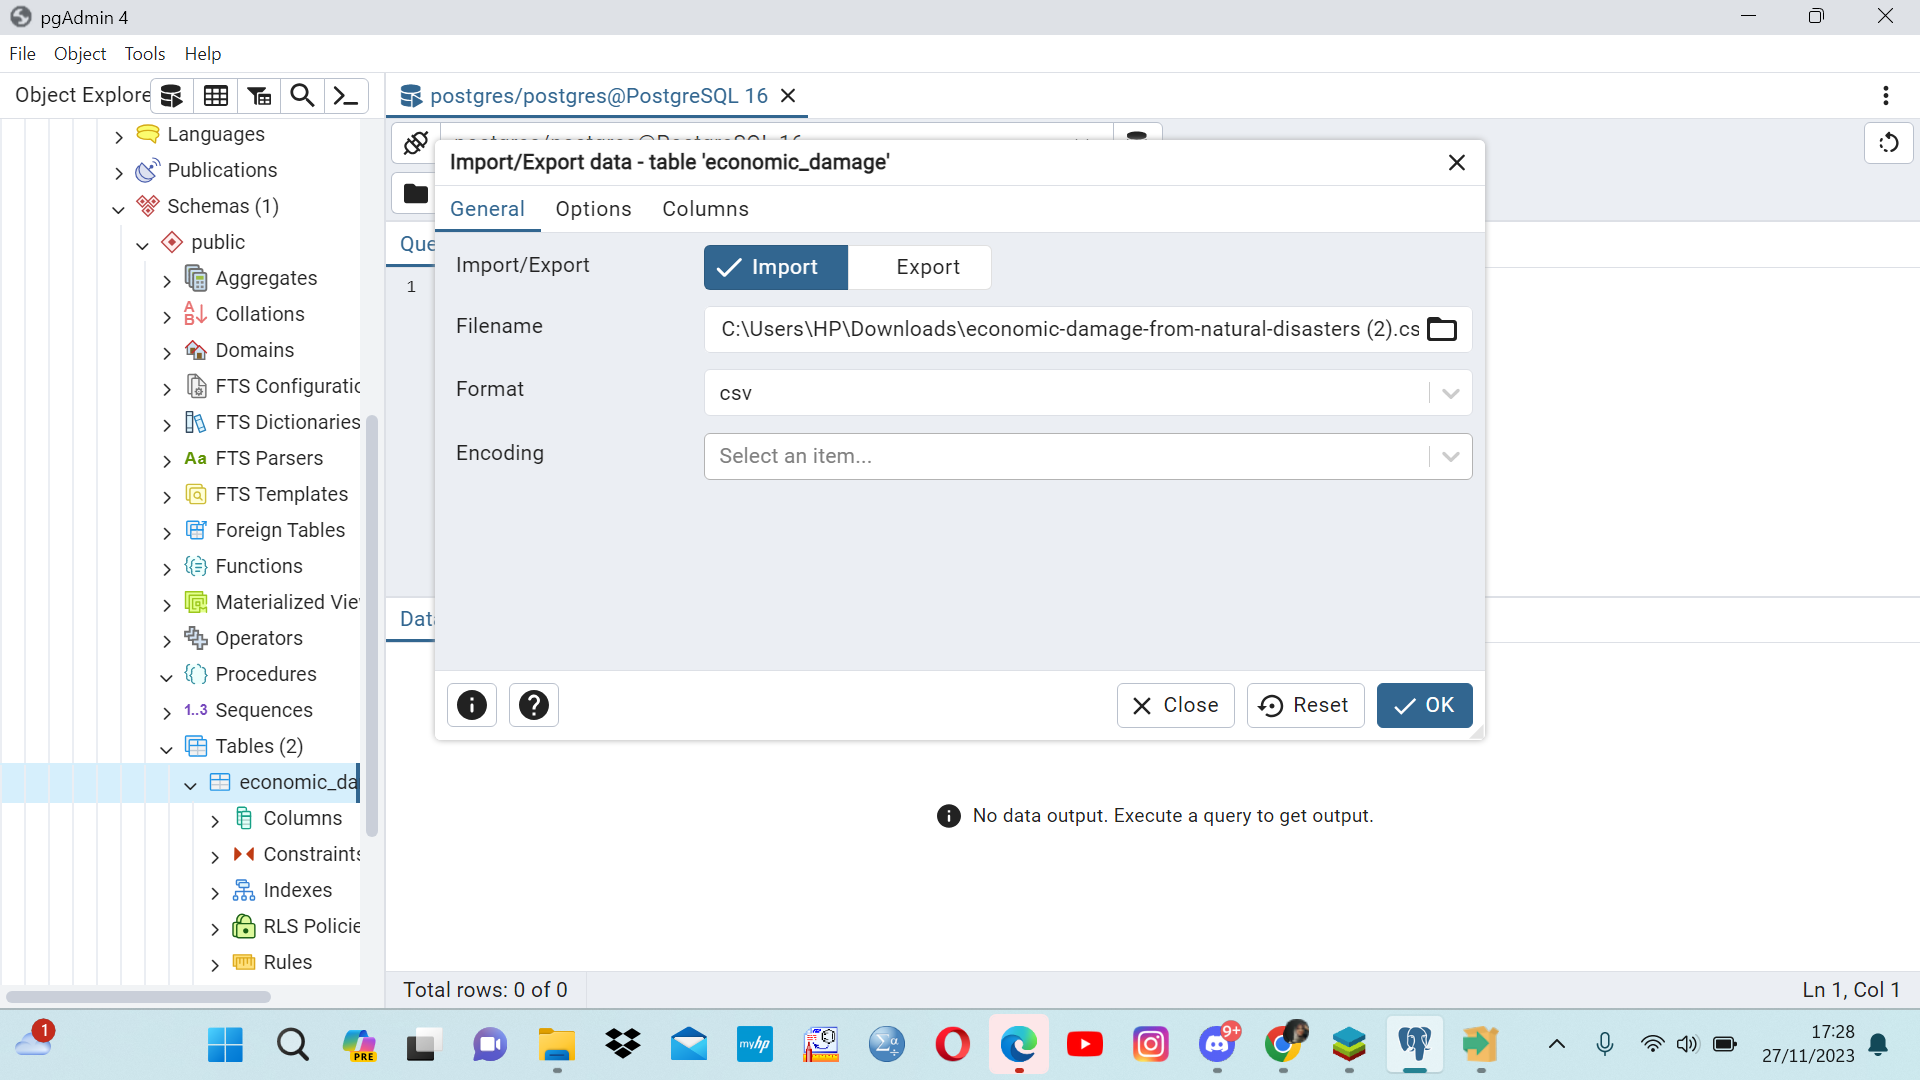

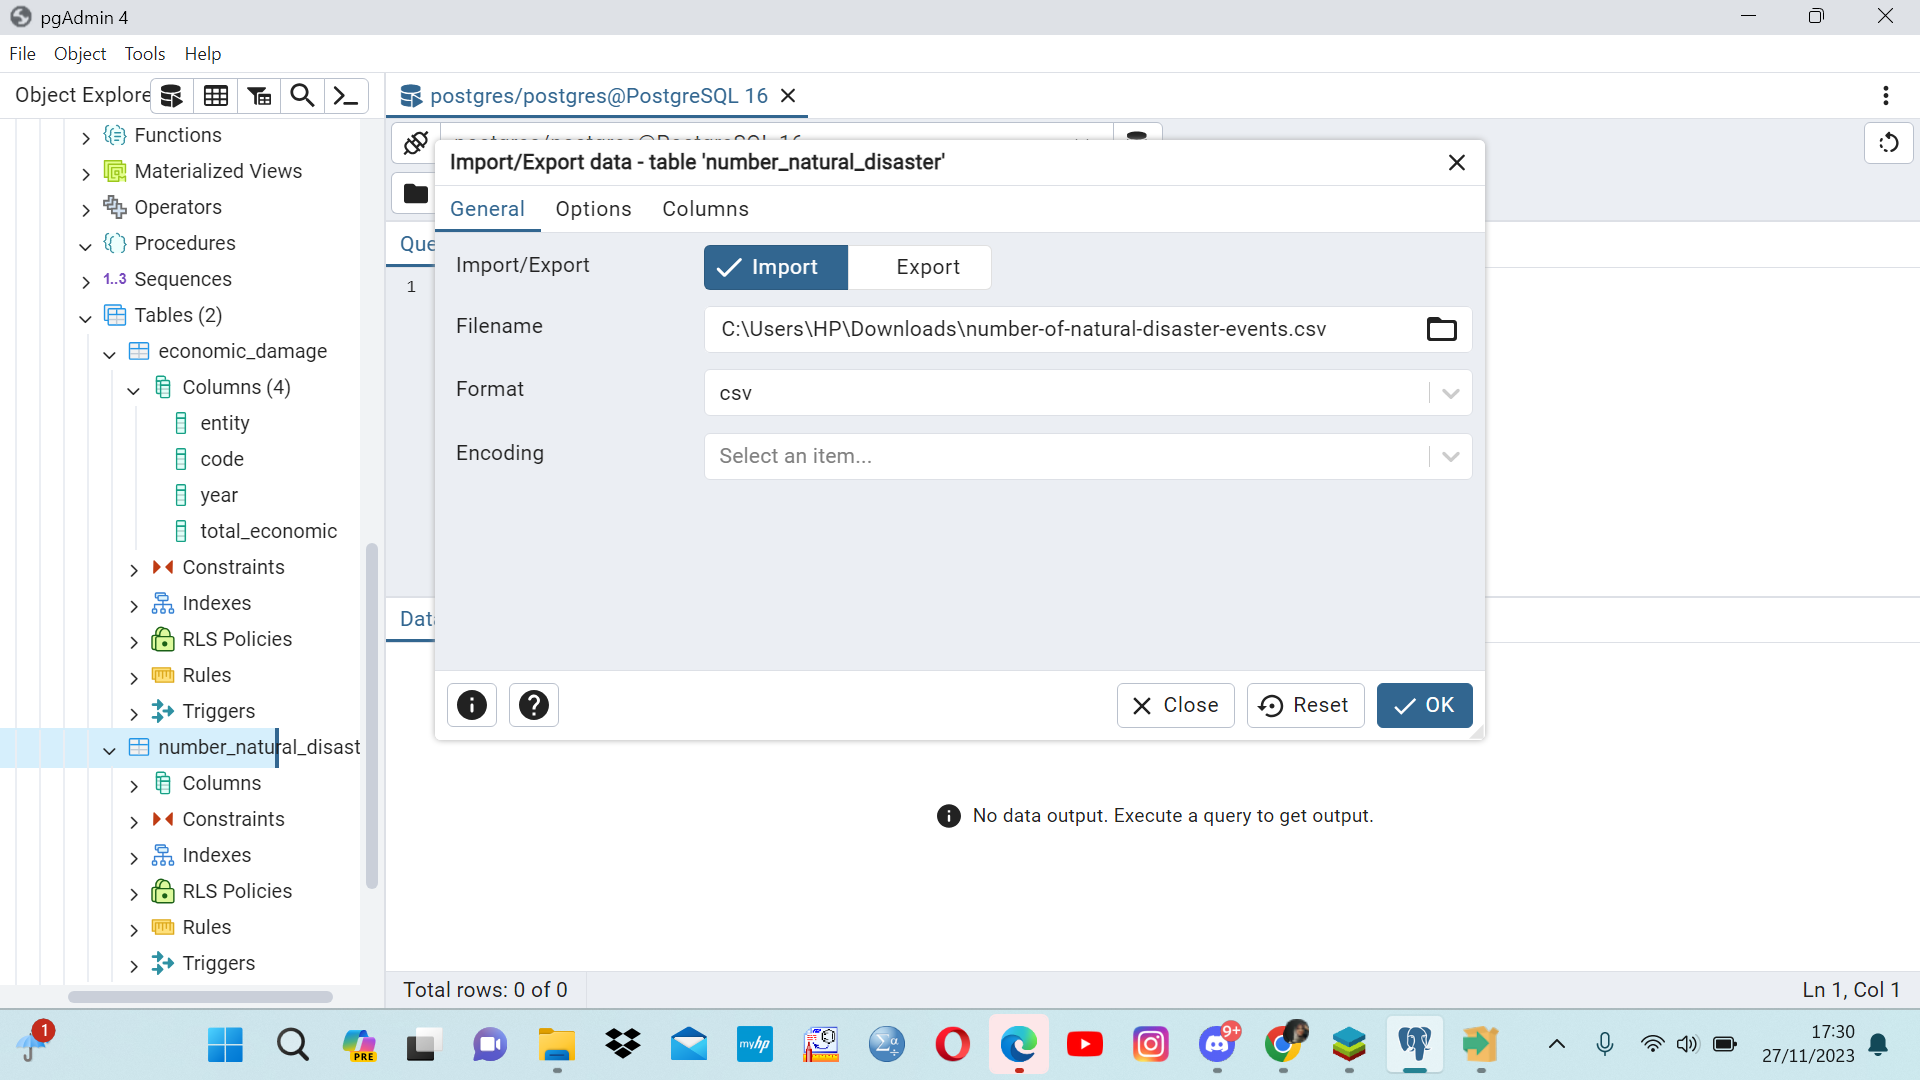

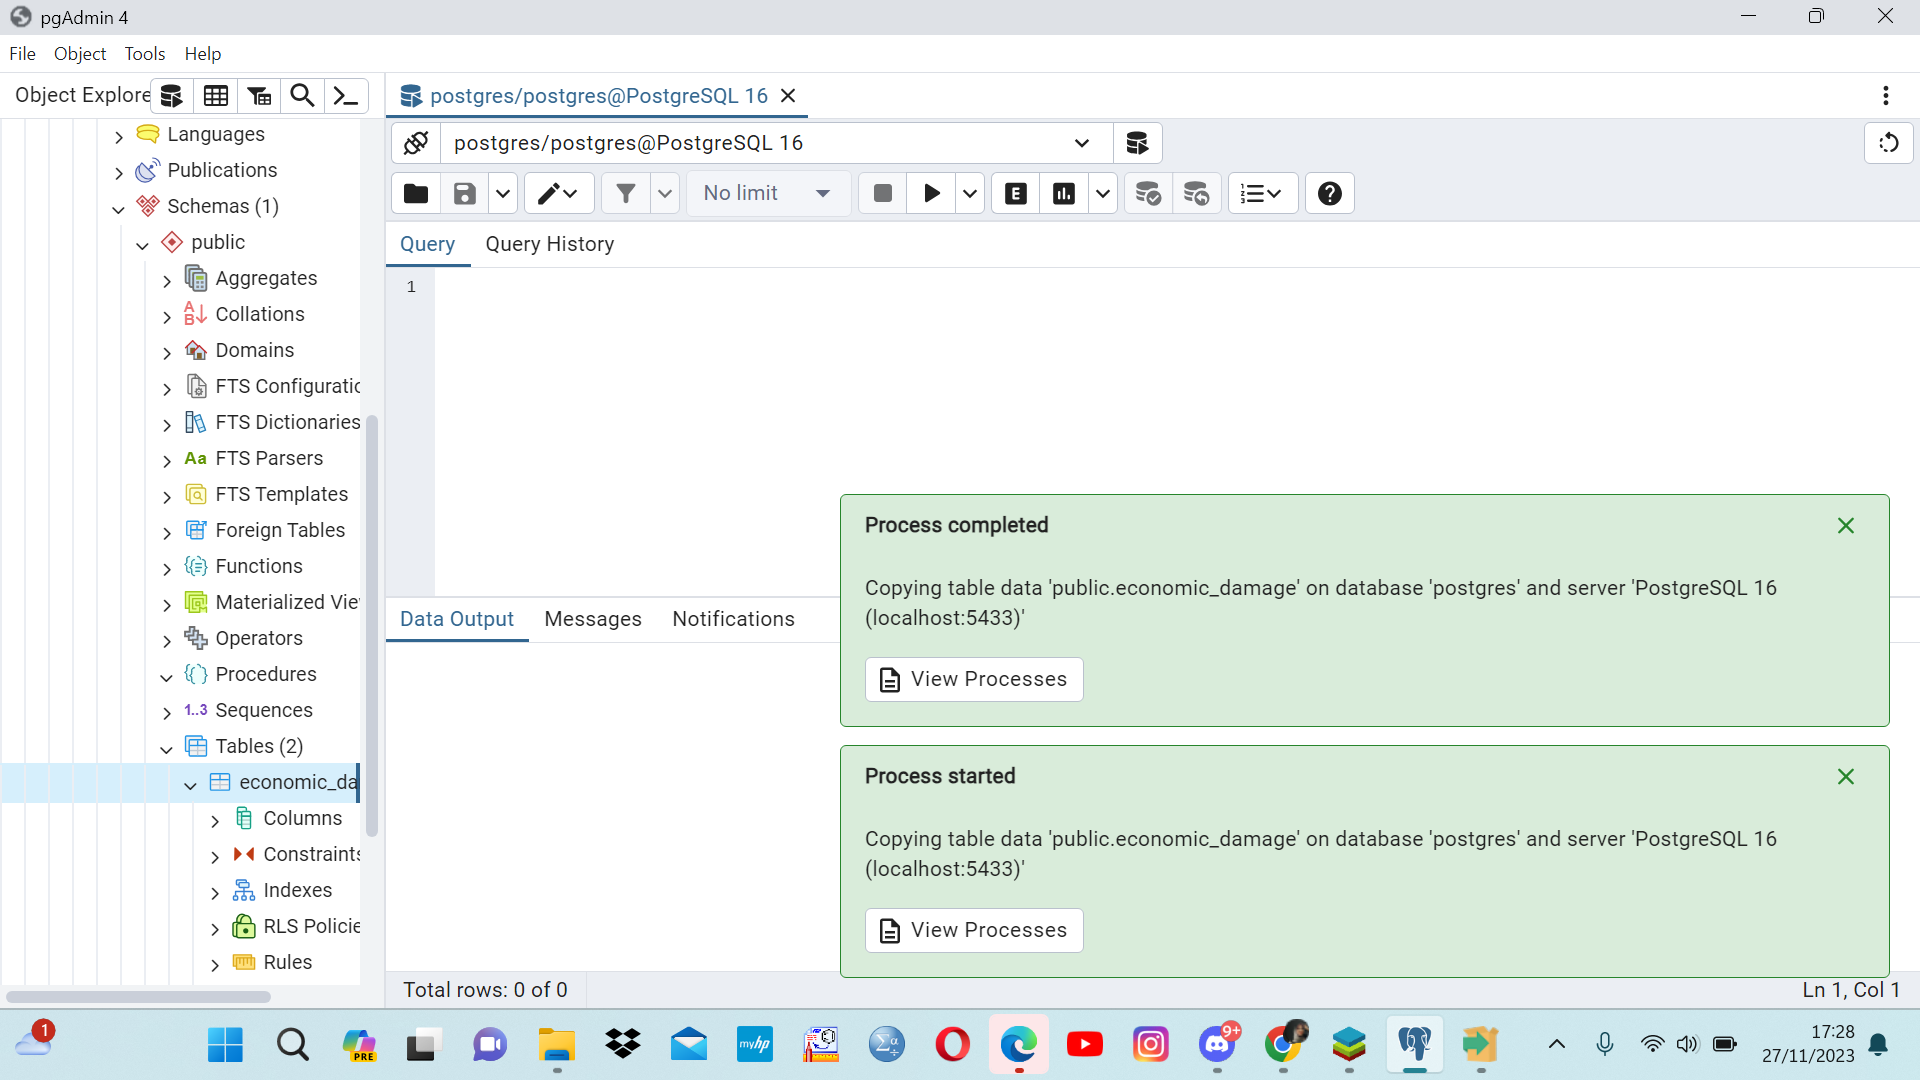

In [ ]:
from IPython.display import Image, display
display(Image('/content/Import data eco..png'))
display(Image('/content/Import number disaster.png'))
display(Image('/content/Import success.png'))

###**2. Menulis Query SQL untuk menampilkan variabel-variabel**

Klik Tools di pojok kanan atas lalu klik Query Tool. Masukan query, di sini saya menghapus kolom code karena null dengan klik kanan table dataset1/dataset2 -> columns -> klik kanan code -> delete -> Yes.

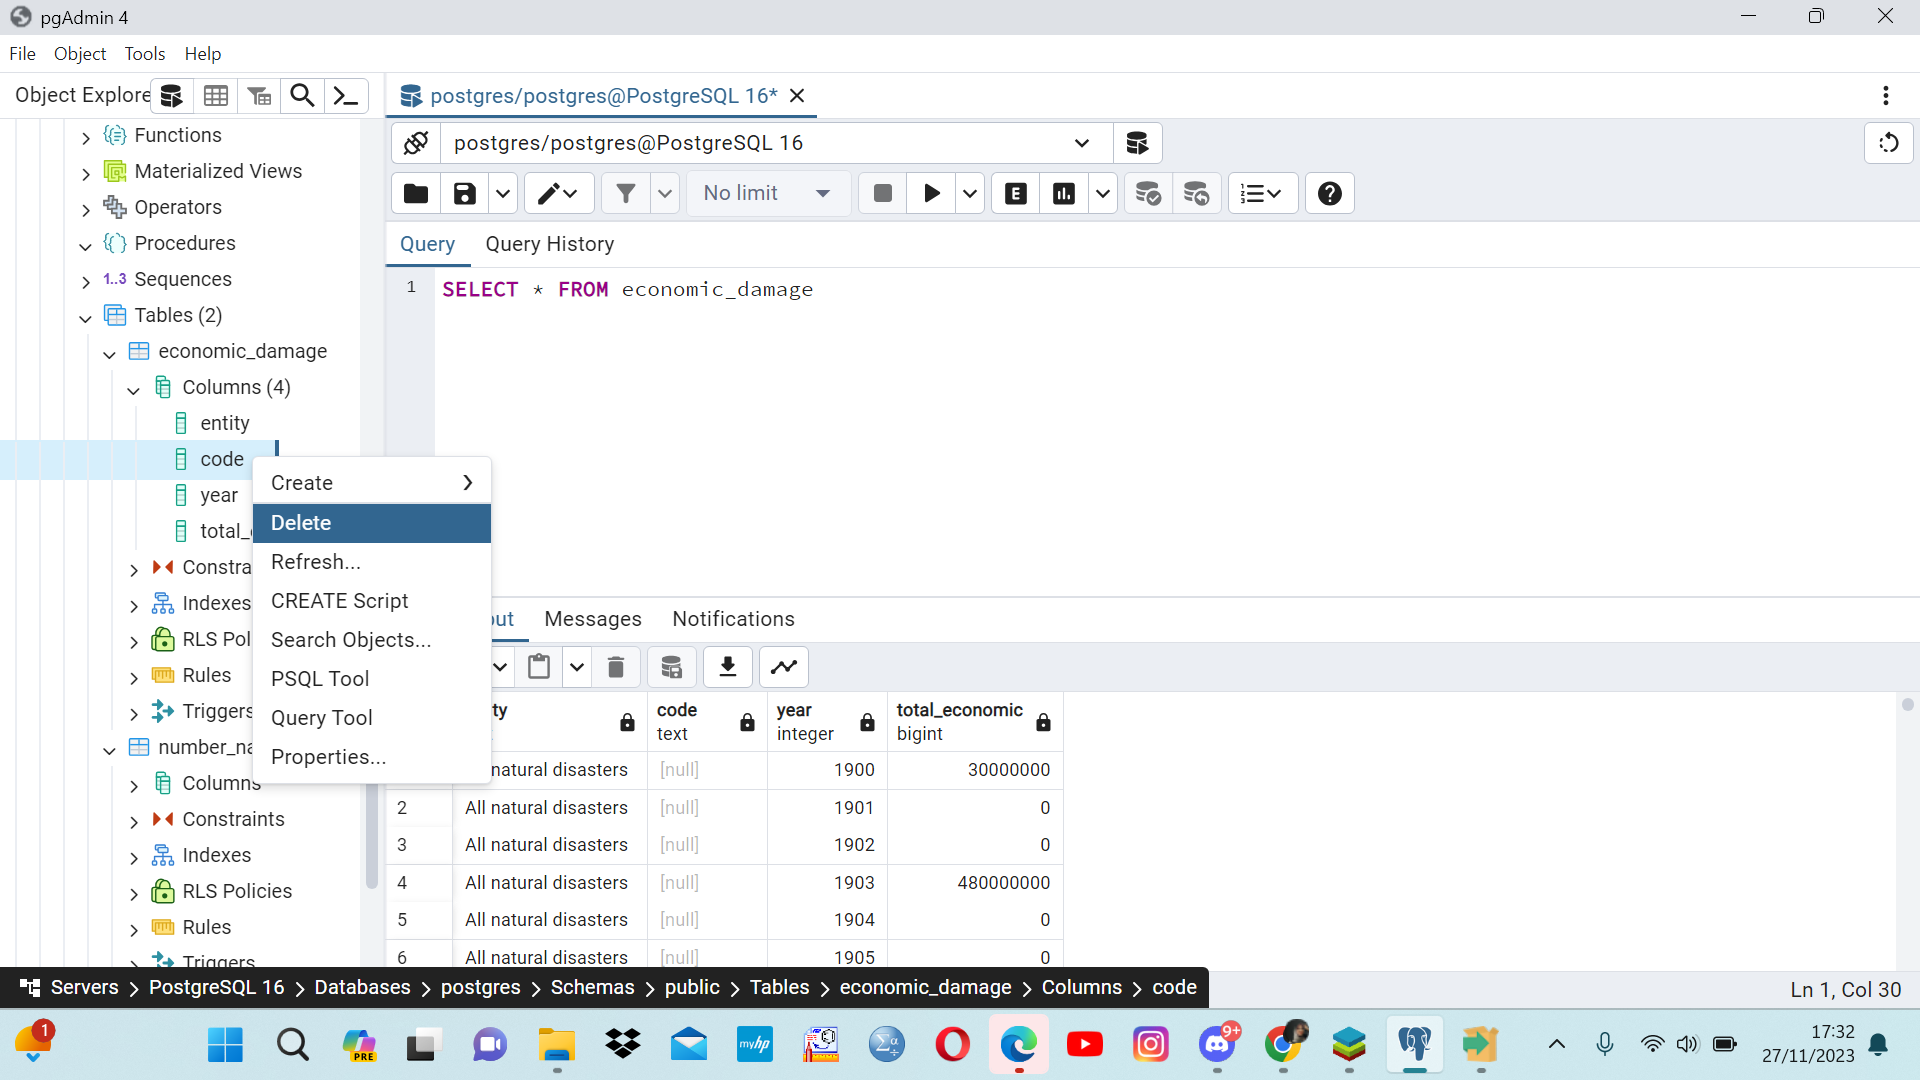

In [ ]:
from IPython.display import Image
Image('/content/Delete column.png')

In [ ]:
# Memanggil dataset number of reported natural disaster
select * from economic_damage

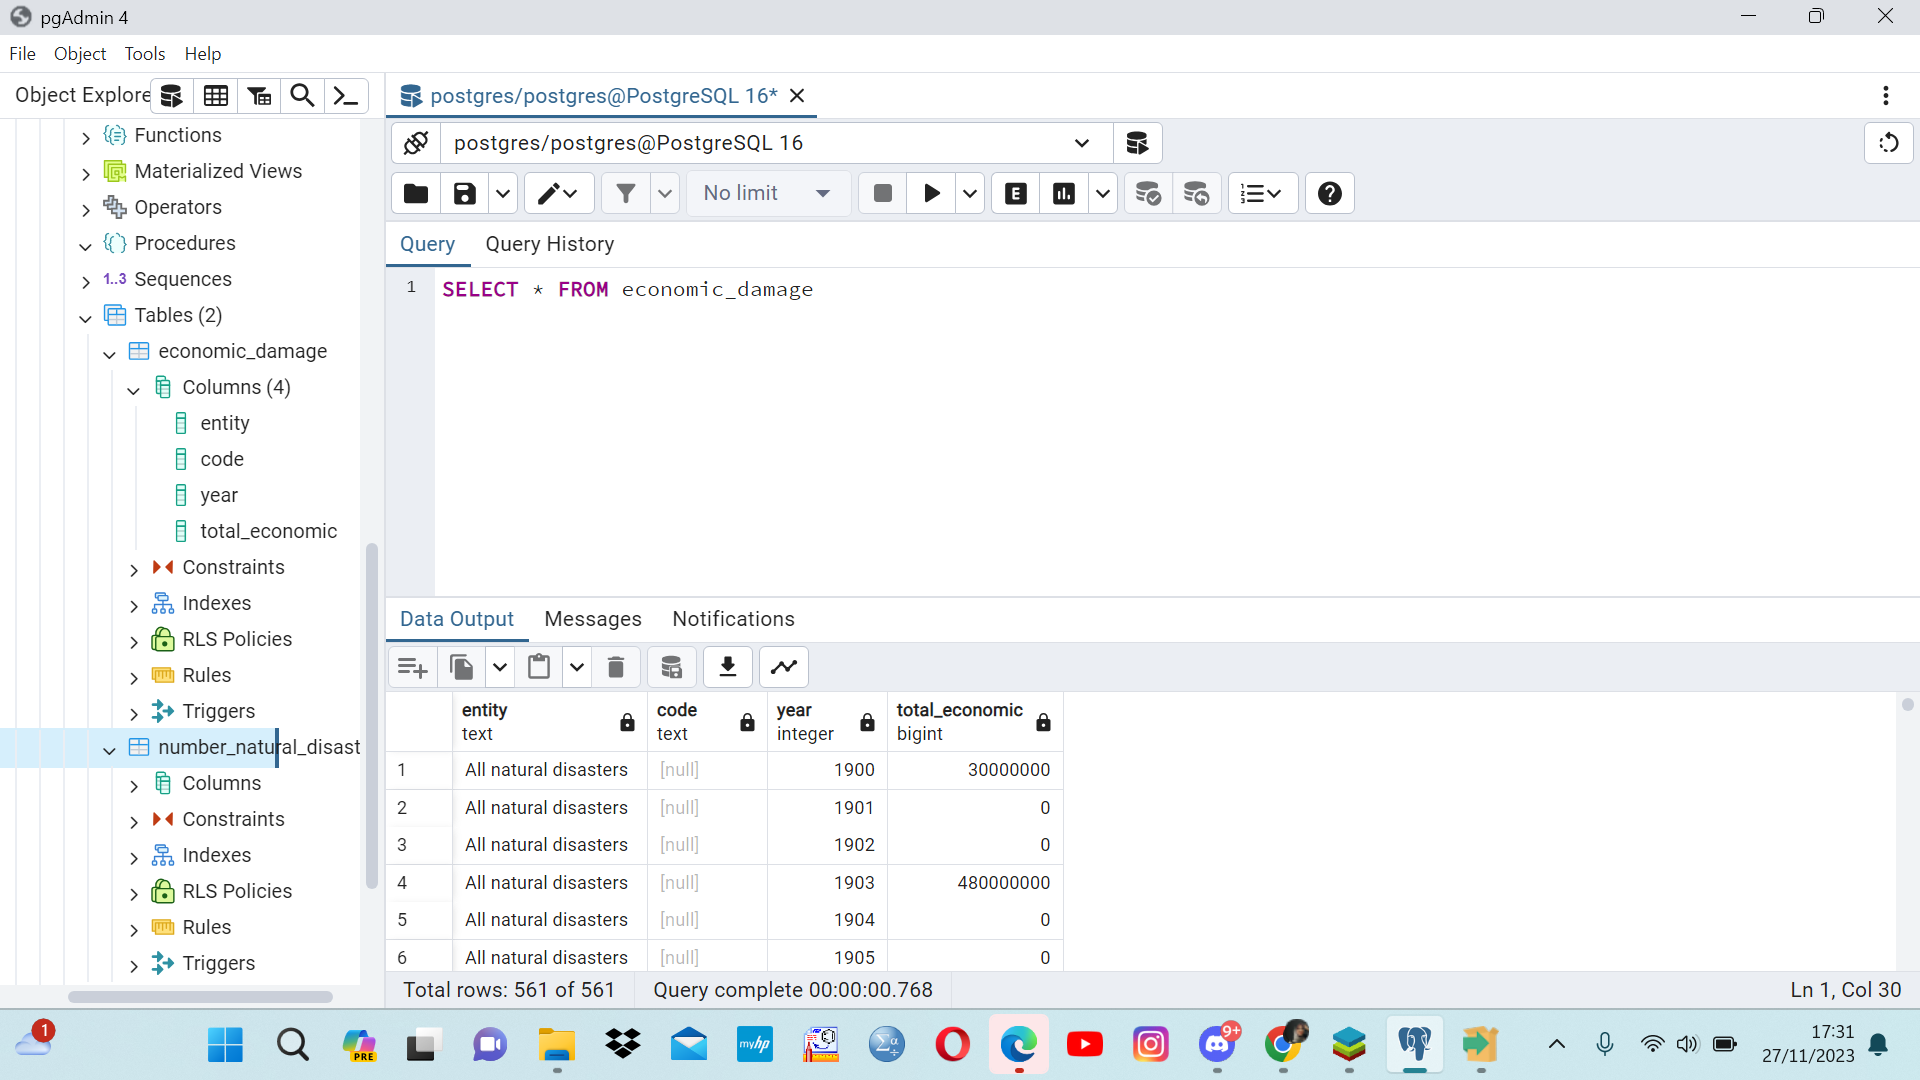

In [ ]:
from IPython.display import Image
Image('/content/Memanggil data.png')

In [ ]:
# Memanggil dataset total economic damage
select * from number_natural_disaster

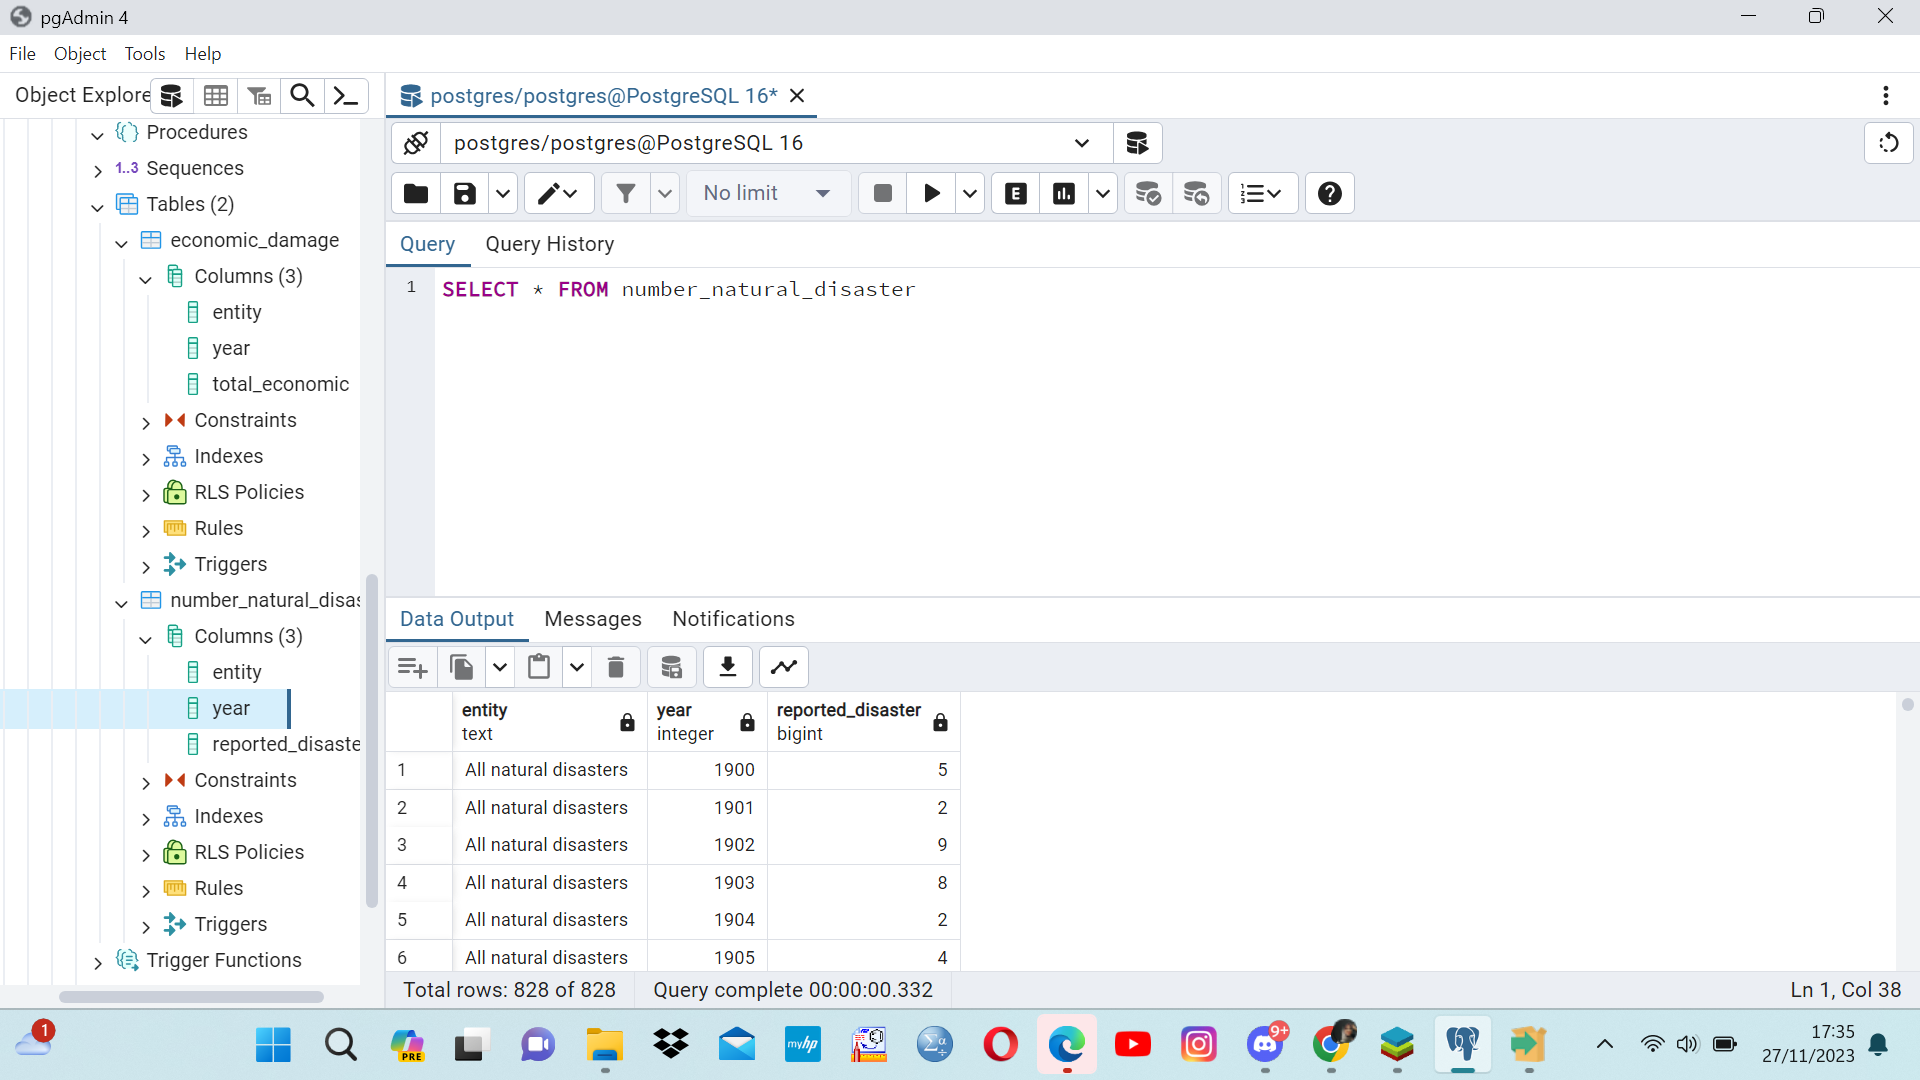

In [ ]:
from IPython.display import Image
Image('/content/Memanggil data number disaster.png')

##**1.2 Database: SQL Query II**

### **1. Menulis Query SQL menampilkan Jumlah Natural Disaster dan Economic Damage untuk setiap jenis bencana (Entity)**

In [ ]:
# Jumlah Bencana Alam dan Kerugian Ekonomi
select d1.entity as Entity,
    sum(d1.reported_disaster) as "Jumlah Bencana Alam",
    sum(d2.total_economic) as "Jumlah Kerugian Bencana"
from number_natural_disaster d1
full join economic_damage d2
on d1.entity = d2.entity and d1.year = d2.year
group by d1.entity
order by d1.entity asc;

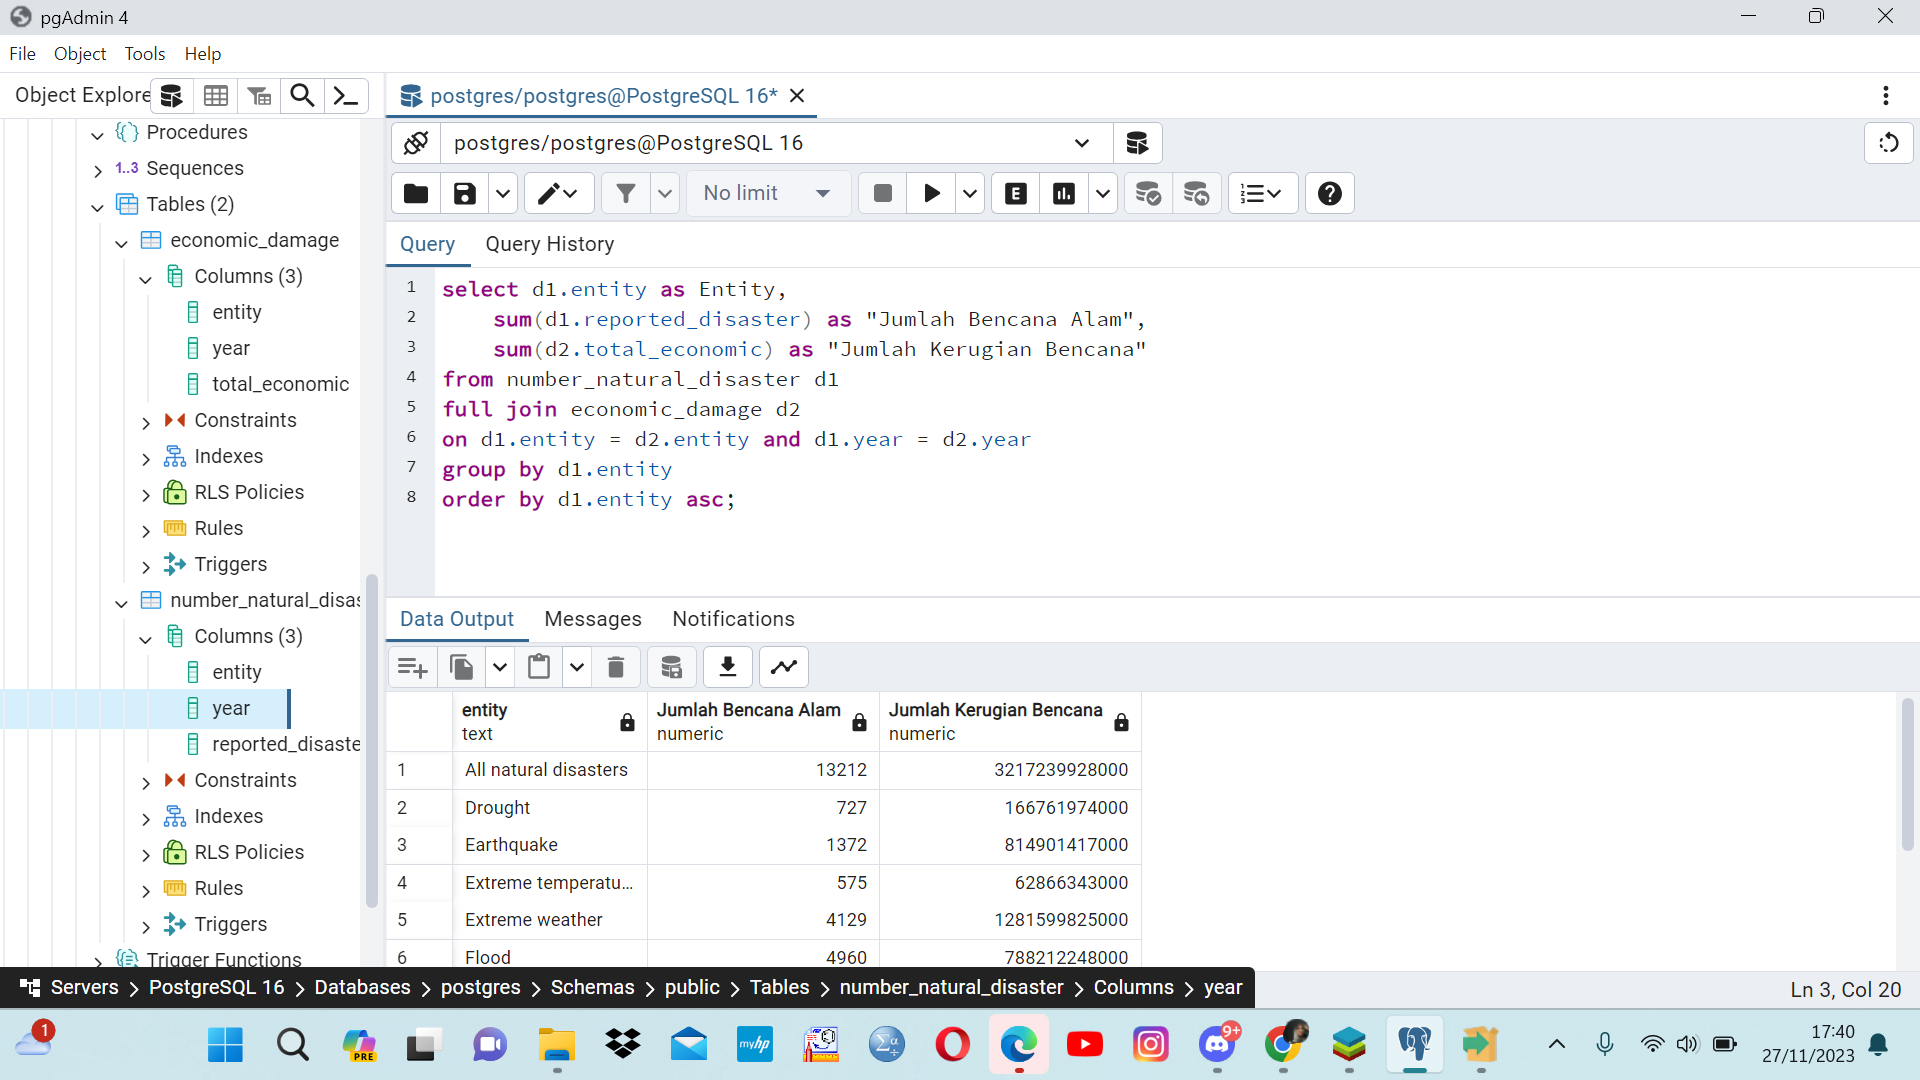

In [ ]:
from IPython.display import Image, display
display(Image('/content/Full join SUM.png'))


### **2. Menulis Query SQL untuk merangkum data per 10 Tahun, menghitung rata-rata dan jumlah Natural Disaster & Economic Damage**

In [ ]:
# Merangkum Per 10 Tahun Berdasarkan Entity dan Year
select
	d1.entity as Entity,
	(d1.year / 10) * 10 as "Per 10 Tahun",
	avg(d1.reported_disaster) as "Rata-rata Bencana",
	sum(d2.total_economic) as "Jumlah Kerugian Ekonomi"
from
	number_natural_disaster d1
full join
	economic_damage d2
	on d1.entity = d2.entity and d1.year = d2.year
group by
	d1.entity, (d1.year / 10) * 10
order by
	d1.entity asc, (d1.year / 10) * 10 asc

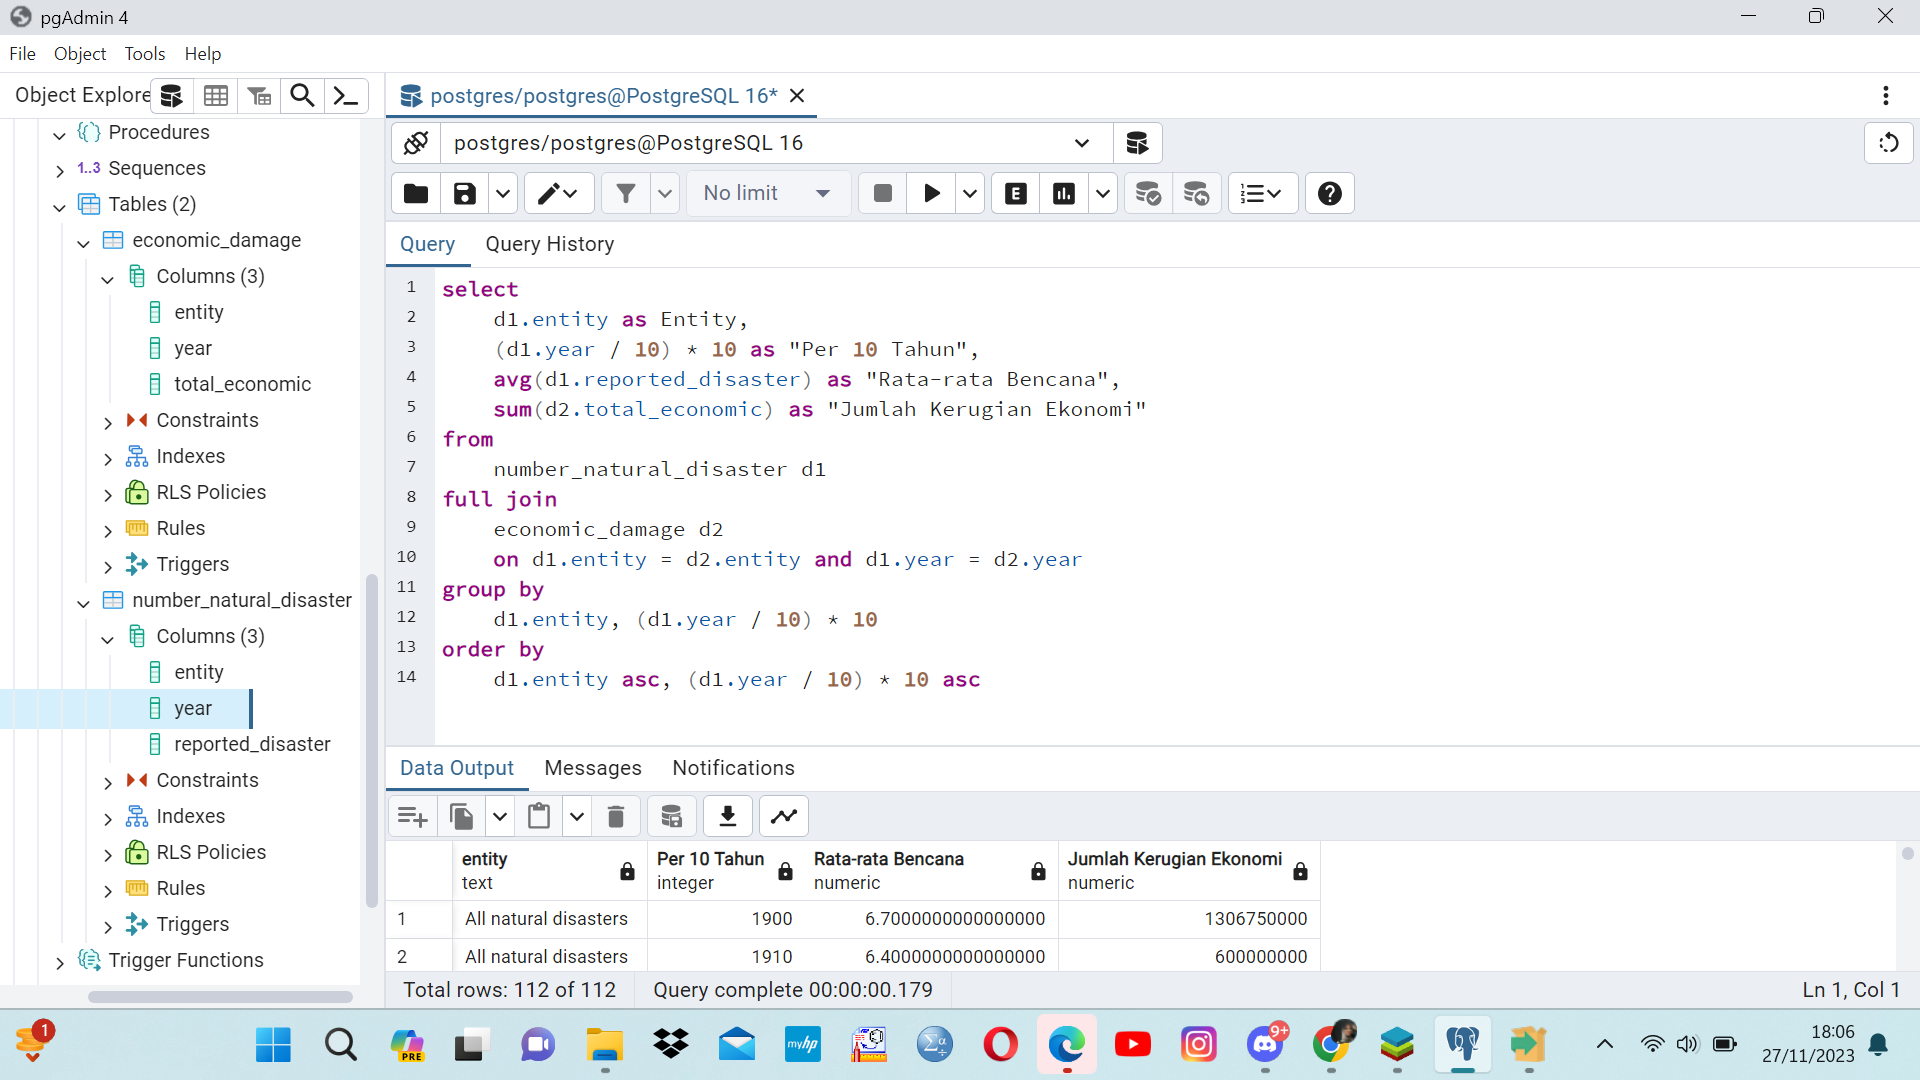

In [ ]:
from IPython.display import Image, display
Image('/content/Full join SUM AVG per 10 tahun.png')

In [ ]:
# Rata-rata Bencana dan Kerugian Per 10 Tahun

select
	(d1.year / 10) * 10 as "Per 10 Tahun",
	avg(d1.reported_disaster) as "Rata-rata Bencana",
	avg(d2.total_economic) as "Rata-rata Kerugian Ekonomi"
from
	number_natural_disaster d1
full join
	economic_damage d2
	on d1.entity = d2.entity and d1.year = d2.year
group by
	(d1.year / 10) * 10
order by
	(d1.year / 10) * 10

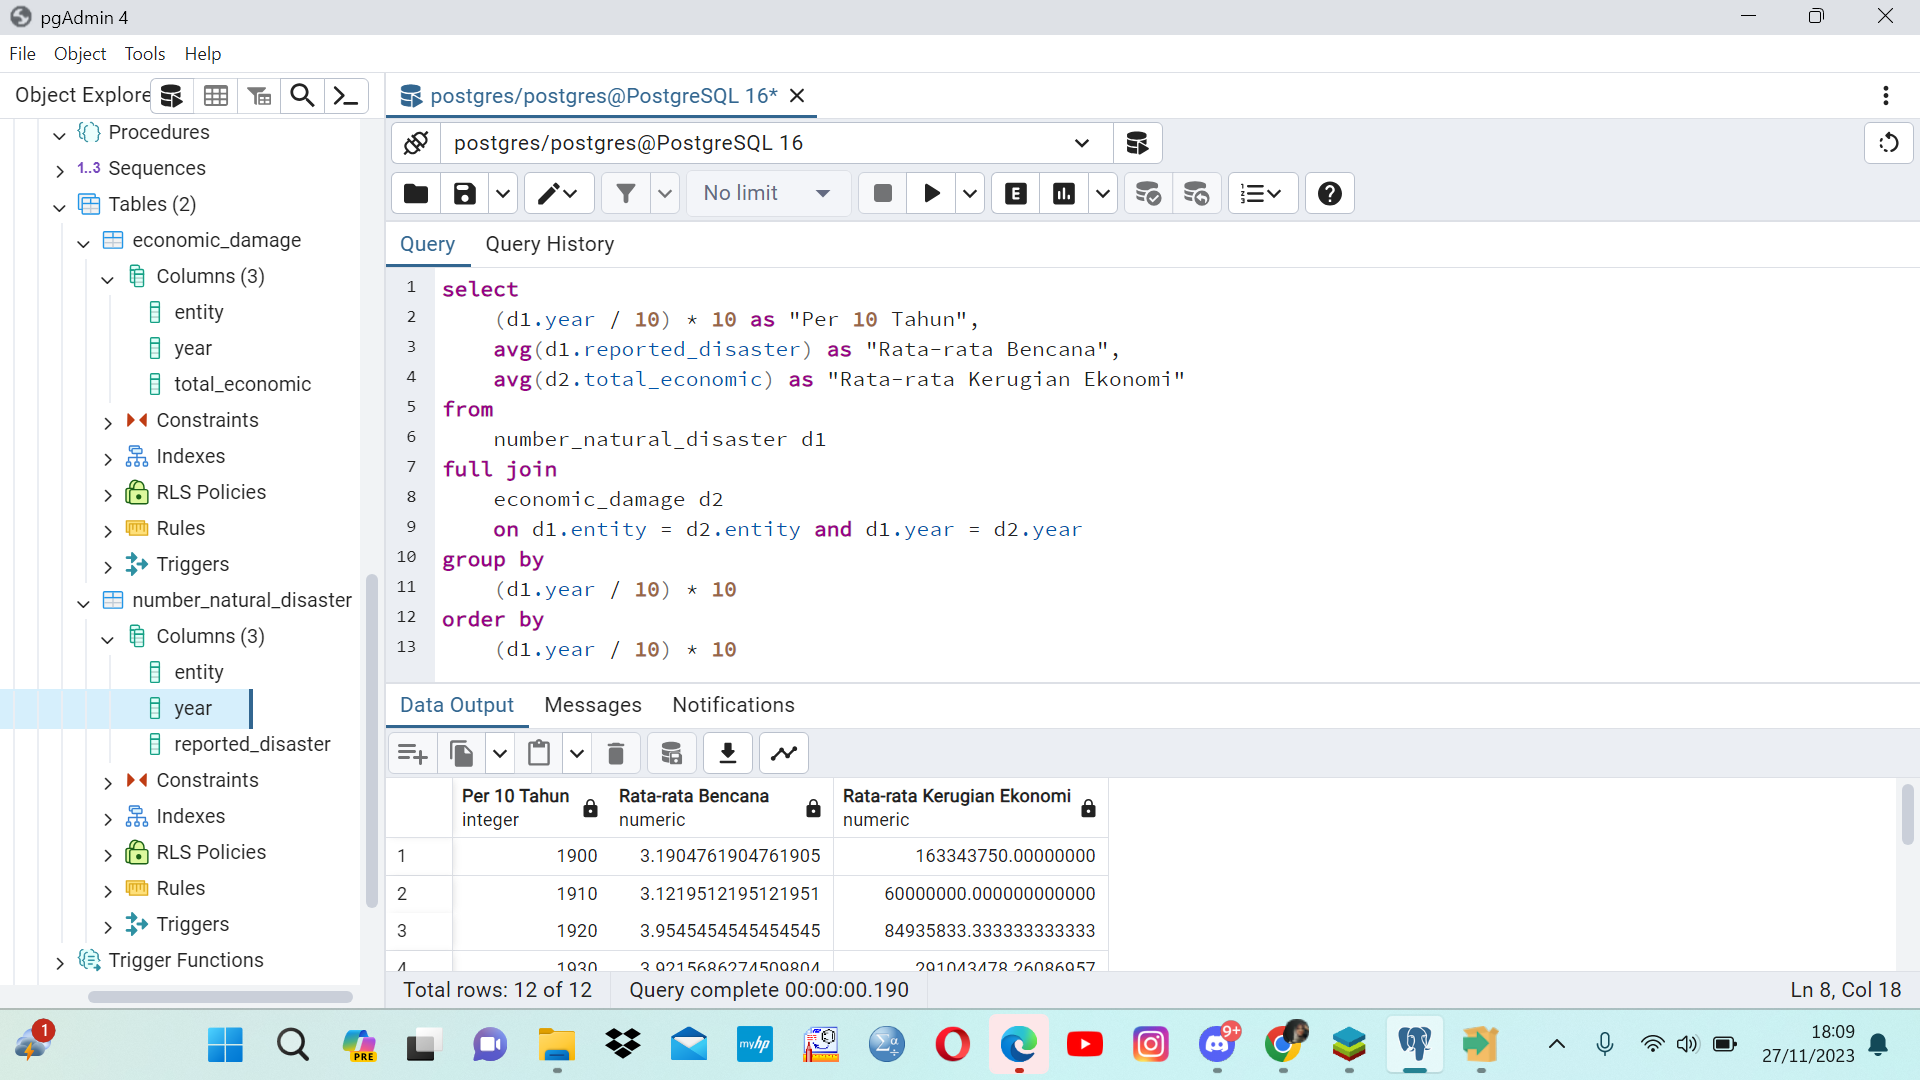

In [ ]:
from IPython.display import Image, display
display(Image('/content/Full join avg per 10 thn.png'))

In [ ]:
# Jumlah Bencana dan Kerugian Ekonomi Per 10 Tahun

select
	(d1.year / 10) * 10 as "Per 10 Tahun",
	sum(d1.reported_disaster) as "Jumlah Bencana",
	sum(d2.total_economic) as "Jumlah Kerugian Ekonomi"
from
	number_natural_disaster d1
full join
	economic_damage d2
	on d1.entity = d2.entity and d1.year = d2.year
group by
	(d1.year / 10) * 10
order by
	(d1.year / 10) * 10

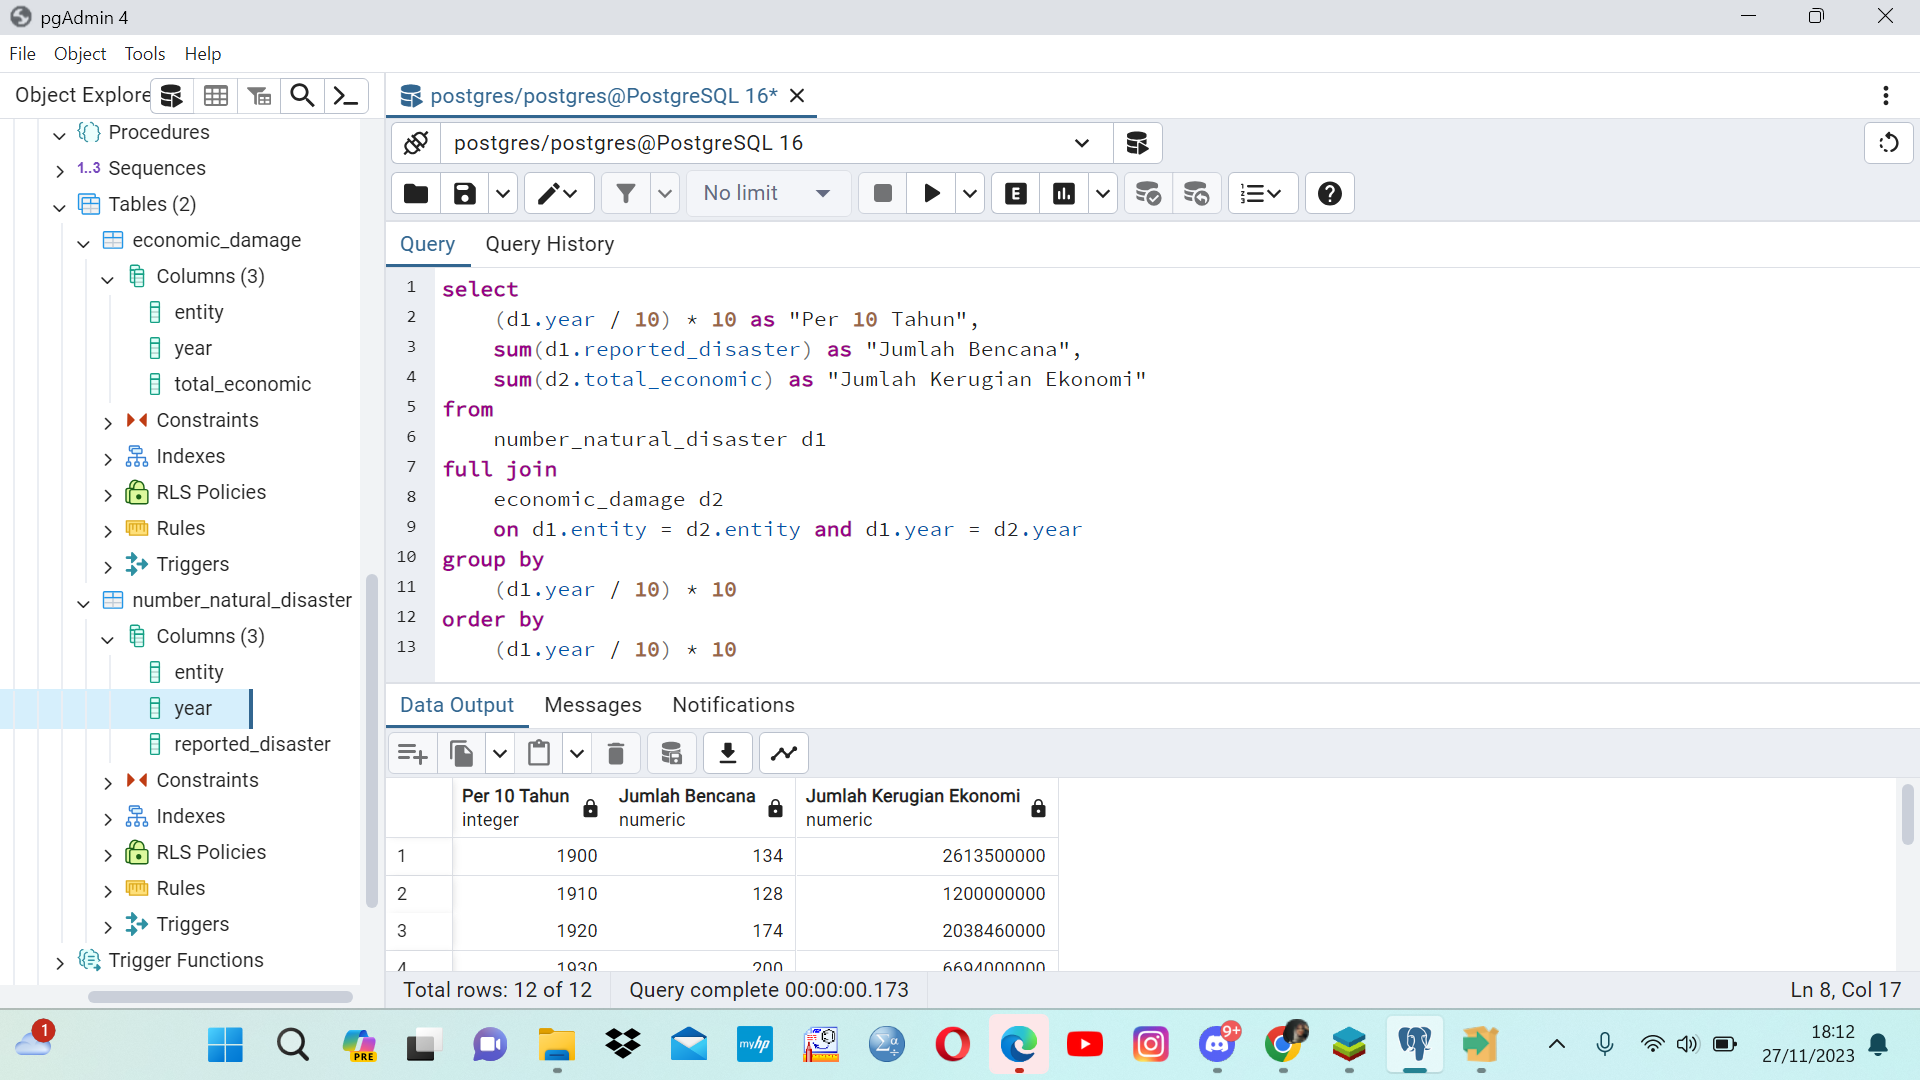

In [ ]:
from IPython.display import Image, display
display(Image('/content/Full join SUM per 10 thn.png'))

#**Part 2: Data Science dan Statistical Analisys**

##**Preparation**

In [ ]:
# Membuat dataset gabungan untuk analisis part 2
create table dataset_join as
select
    coalesce(d1.entity, d1.entity) as Entity,
    coalesce(d1.year, d1.year) as year, natural_disaster, economic_damage
from
    dataset1 d1
full join
    dataset2 d2
    on d1.year = d2.year and d1.entity = d2.entity

In [ ]:
from IPython.display import Image
Image('create dataset join.png')

###**Import Library**

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

###**Load Data**

In [ ]:
# Menginput dan membaca dataset
df = pd.read_csv('/content/full join.csv')
df

coalesce  coalesce-2  reported_disaster  total_economic
0    All natural disasters        1900                  5      30000000.0
1    All natural disasters        1901                  2             0.0
2    All natural disasters        1902                  9             0.0
3    All natural disasters        1903                  8     480000000.0
4    All natural disasters        1904                  2             0.0
..                     ...         ...                ...             ...
823    Extreme temperature        2004                 16             NaN
824    Mass movement (dry)        2006                  1             NaN
825        Extreme weather        1943                  3             NaN
826      Volcanic activity        1988                  5             NaN
827    Extreme temperature        1981                  2             NaN

[828 rows x 4 columns]

##**EDA**

###**Descriptive Statistics**

In [ ]:
df.describe()

coalesce-2  reported_disaster  total_economic
count   828.000000         828.000000    5.610000e+02
mean   1969.506039          31.913043    1.146966e+10
std      32.540756          67.393086    3.199525e+10
min    1900.000000           1.000000    0.000000e+00
25%    1946.000000           2.000000    6.850000e+07
50%    1975.000000           7.000000    8.400000e+08
75%    1997.000000          23.000000    5.444777e+09
max    2018.000000         432.000000    3.640932e+11

**Statistik Deskriptif - Masic Measures:**

1. Number of Reported Natural Disaster:
*   Mean = 31.91
*   Median = 7.00
*   Standar deviasi = 67.39

-
2. Total Economic Damage:
*   Mean = 1.146966e+10
*   Median = 8.400000e+08
*   Standar deviasi = 3.199525e+10

In [ ]:
df[df['coalesce']=='All natural disasters'].describe()

coalesce-2  reported_disaster  total_economic
count   119.000000         119.000000    1.190000e+02
mean   1959.000000         111.025210    2.703563e+10
std      34.496377         133.958282    5.517178e+10
min    1900.000000           2.000000    0.000000e+00
25%    1929.500000          10.500000    6.075000e+07
50%    1959.000000          33.000000    1.043000e+09
75%    1988.500000         202.000000    2.725059e+10
max    2018.000000         432.000000    3.640932e+11

**Statistik Deskriptif - Masic Measures Untuk Entity=All natural disaters**

1. Number of Reported Natural Disaster:
*   Mean = 111.03
*   Median = 33.00
*   Standar deviasi = 133.95

-
2. Total Economic Damage:
*   Mean = 2.703563e+10
*   Median = 1.043000e+09
*   Standar deviasi = 5.517178e+10

###**Univariate Analysis**

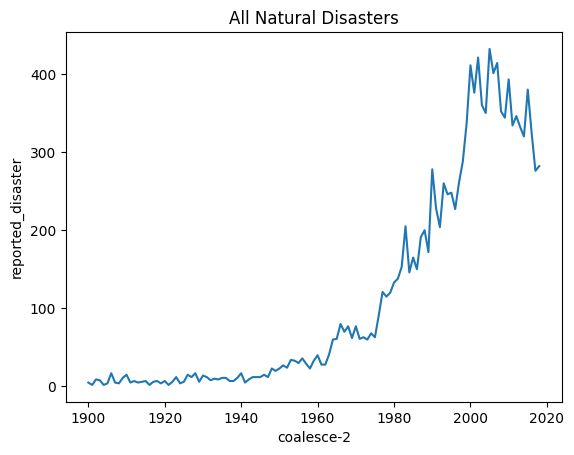

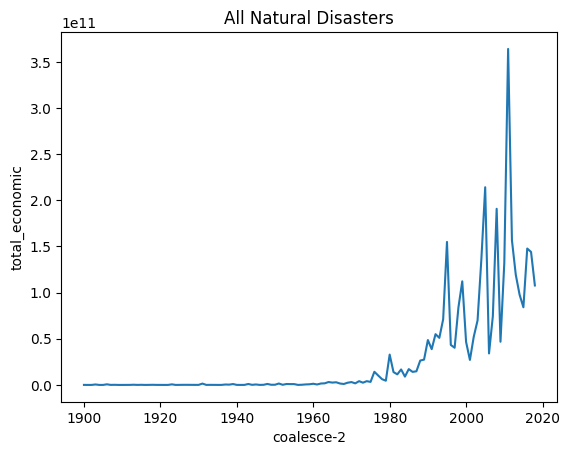

In [ ]:
# Lineplot 'All Natural Disasters'
sns.lineplot(data=df[df['coalesce']=='All natural disasters'], x='coalesce-2', y='reported_disaster')
plt.title('All Natural Disasters')
plt.show()
sns.lineplot(data=df[df['coalesce']=='All natural disasters'], x='coalesce-2', y='total_economic')
plt.title('All Natural Disasters')
plt.show()

In [ ]:
# Membentuk ulang DataFrame yang diorganisir oleh nilai indeks/kolom yang diberikan.
# Membuat "tabel pivot" untuk meringkas data tabel yang lebih luas, tanpa baris All natural disasters
df_pivot = df[df['coalesce']!='All natural disasters'].pivot(columns='coalesce', index='coalesce-2', values=['reported_disaster', 'total_economic'])

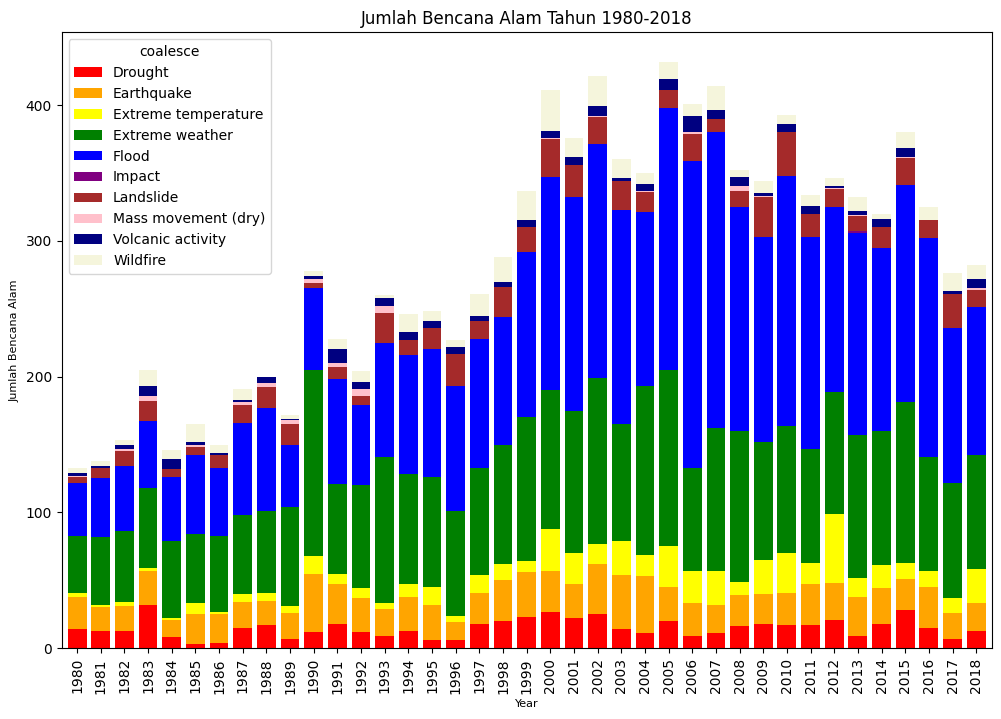

In [ ]:
# Plot Number of Reported Natural Disasters for 1980-2018

# Menentukan Warna
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'pink', 'navy', 'beige']

# Menentukan data barplot yang akan ditampilkan
df_pivot['reported_disaster'].loc[1980:].plot.bar(width = 0.8, stacked = True, color = colors, figsize = (12, 8))

# Menentukan judul dan sub judul
plt.title('Jumlah Bencana Alam Tahun 1980-2018', fontsize = 12)
plt.xlabel('Year', fontsize = 8)
plt.ylabel('Jumlah Bencana Alam', fontsize = 8)

plt.show()

Barplot Number of Natural Disaster and Year tahun 1980-2018 menunjukkan paling tinggi terjadi bencana di tahun 2005 dan yang tertinggi bencana 'Flood'. Sedangkan paling rendah terjadi bencana di tahun 1980 dimana yang tertinggi bencana 'Flood dan Extreme weather'.

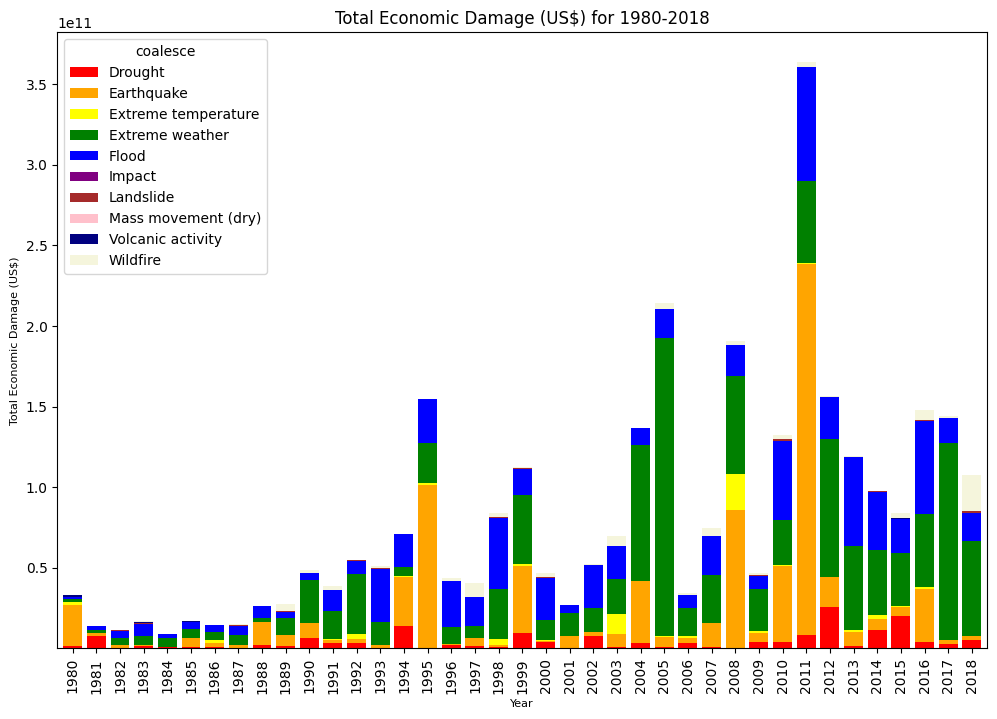

In [ ]:
# Plot Total Economic Damage (US$) for 1980-2018

# Menentukan data barplot yang akan ditampilkan
df_pivot['total_economic'].loc[1980:].plot.bar(width = 0.8, stacked = True, color = colors, figsize = (12, 8))

# Menentukan judul dan sub judul
plt.title('Total Economic Damage (US$) for 1980-2018', fontsize = 12)
plt.xlabel('Year', fontsize = 8)
plt.ylabel('Total Economic Damage (US$)', fontsize = 8)

plt.show()

Barplot Number of Natural Disaster and Year tahun 1980-2018 menunjukkan paling tinggi terjadi bencana di tahun 2011 dan yang tertinggi bencana 'Earthquake'. Sedangkan paling rendah terjadi bencana di tahun 1984 dan yang tertinggi bencana 'Extreme weather'.

###**Bivariate Analysis**

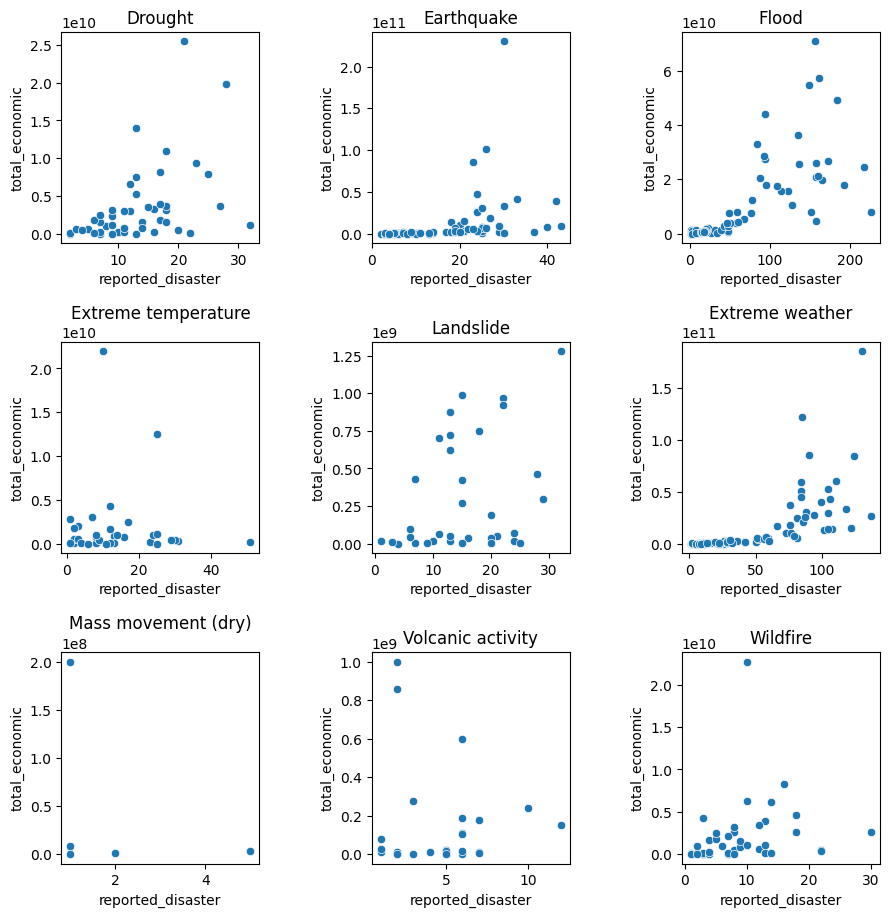

In [ ]:
# Scatterplot
fig, axes = plt.subplots(3, 3, figsize=(10,10))
fig.tight_layout(pad=5)

fig.suptitle('')

sns.scatterplot(ax=axes[0,0], data=df[df['coalesce']=='Drought'], x='reported_disaster', y='total_economic')
sns.scatterplot(ax=axes[0,1], data=df[df['coalesce']=='Earthquake'], x='reported_disaster', y='total_economic')
sns.scatterplot(ax=axes[0,2], data=df[df['coalesce']=='Flood'], x='reported_disaster', y='total_economic')
sns.scatterplot(ax=axes[1,0], data=df[df['coalesce']=='Extreme temperature'], x='reported_disaster', y='total_economic')
sns.scatterplot(ax=axes[1,1], data=df[df['coalesce']=='Landslide'], x='reported_disaster', y='total_economic')
sns.scatterplot(ax=axes[1,2], data=df[df['coalesce']=='Extreme weather'], x='reported_disaster', y='total_economic')
sns.scatterplot(ax=axes[2,0], data=df[df['coalesce']=='Mass movement (dry)'], x='reported_disaster', y='total_economic')
sns.scatterplot(ax=axes[2,1], data=df[df['coalesce']=='Volcanic activity'], x='reported_disaster', y='total_economic')
sns.scatterplot(ax=axes[2,2], data=df[df['coalesce']=='Wildfire'], x='reported_disaster', y='total_economic')

axes[0,0].set(title='Drought')
axes[0,1].set(title='Earthquake')
axes[0,2].set(title='Flood')
axes[1,0].set(title='Extreme temperature')
axes[1,1].set(title='Landslide')
axes[1,2].set(title='Extreme weather')
axes[2,0].set(title='Mass movement (dry)')
axes[2,1].set(title='Volcanic activity')
axes[2,2].set(title='Wildfire')
plt.show()

Scatterplot dia atas memiliki korelasi positif yang cukup kuat karena bergerak dari kiri bawah ke kanan atas, kecuali 'Mass movement (dry)' korelasinya sedikit.

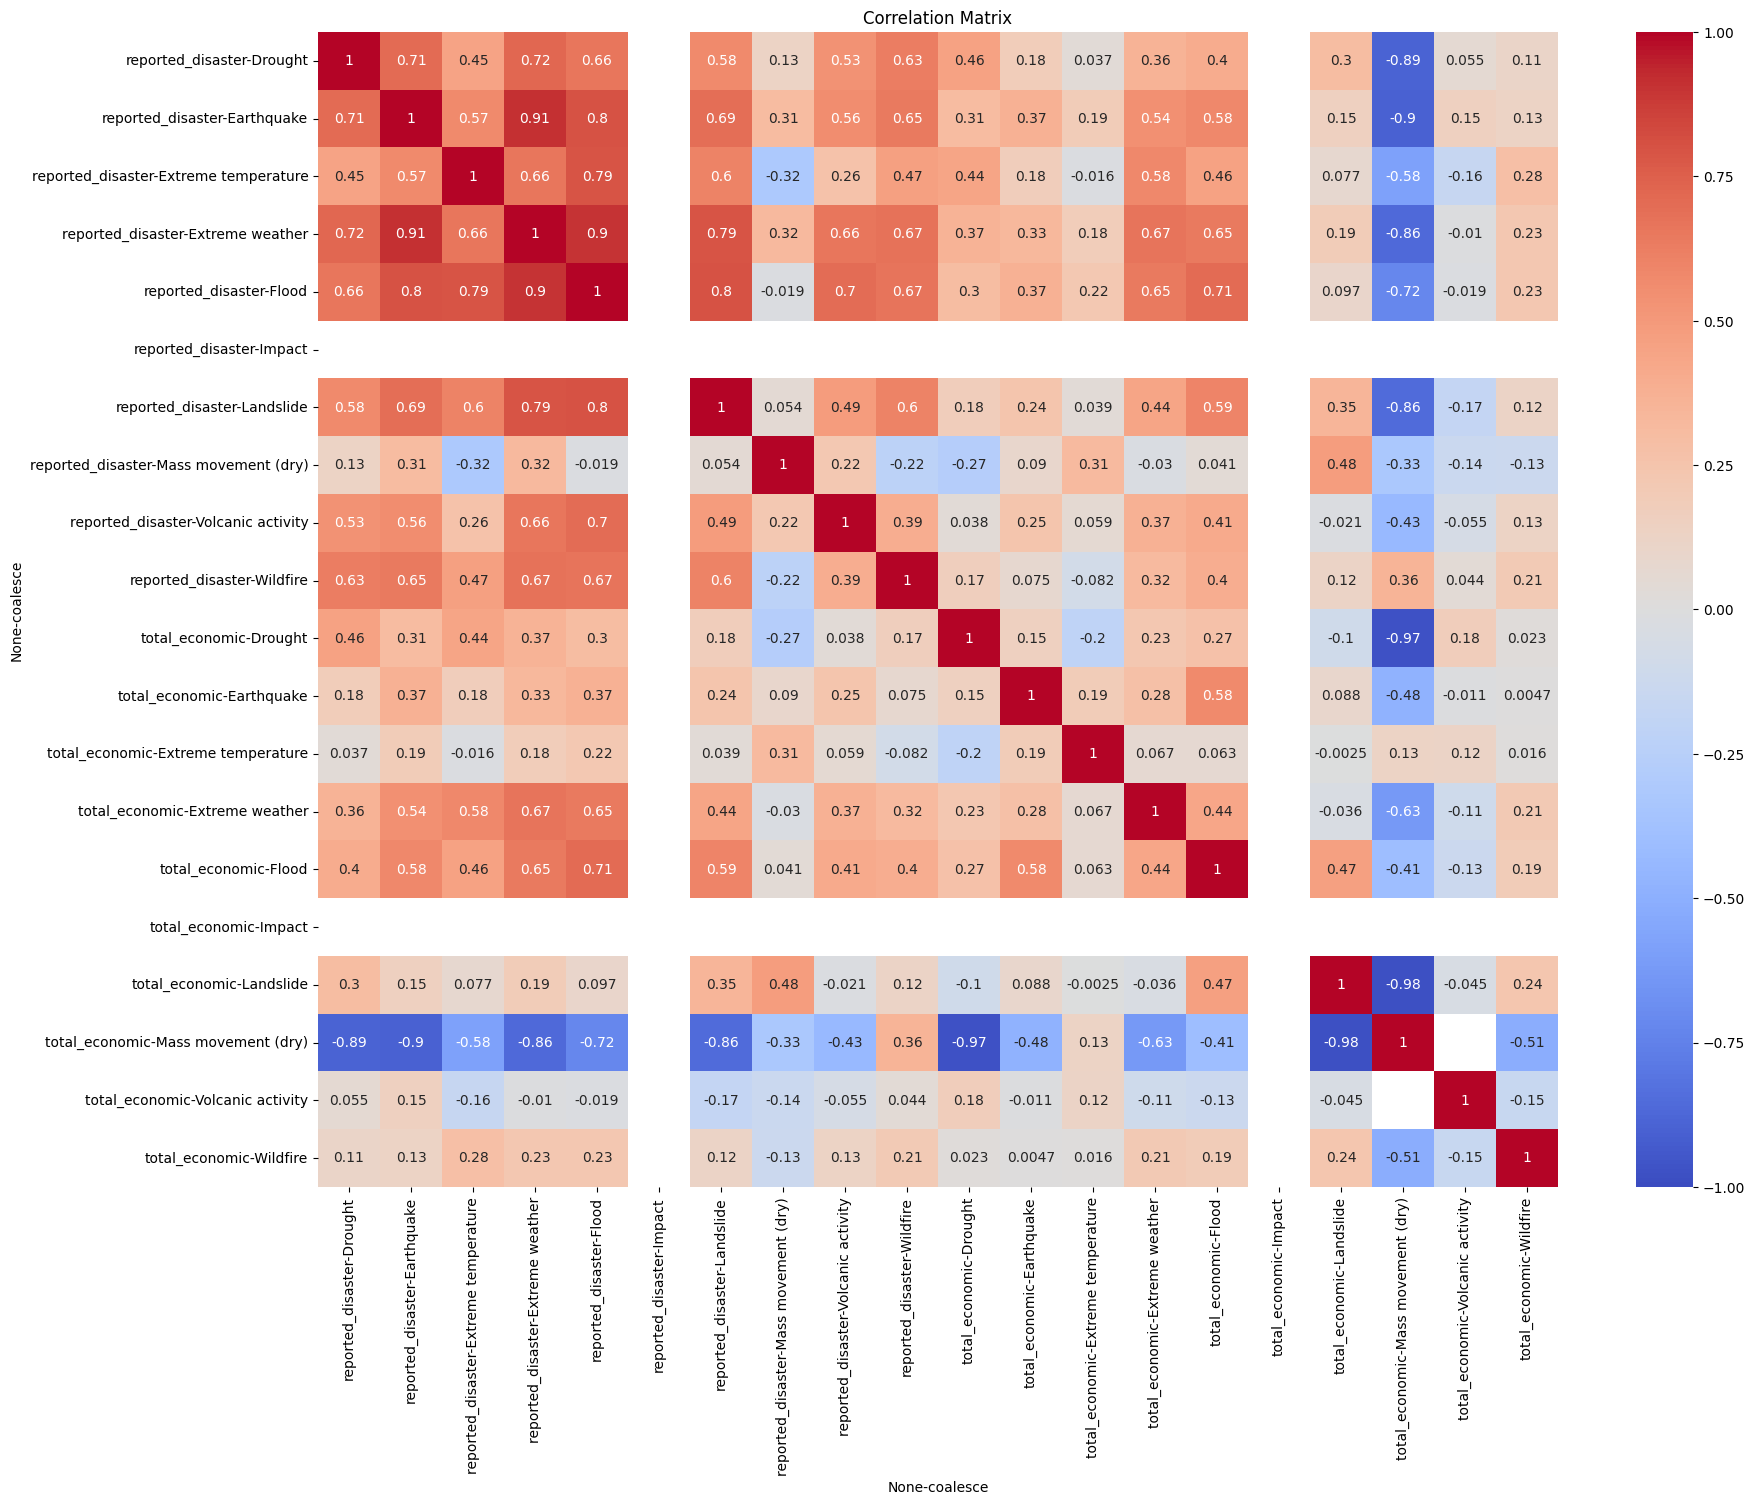

In [ ]:
# Korelasi matrix menggunakan heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df_pivot.corr(), annot = True, cmap='coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()

Korelasi matrix di atas sangatlah beragam, korelasi yang paling tinggi (0.91) adalah number_of_reported-Earthquake dengan number_of_reported-Extreme weather. Sedangkan, korelasi yang paling rendah (-0.89) adalah total_economic_damage-Mass movement (dry) dengan number_of_reported-Volcanic activity.

##**Modelling & Evaluation**

###**Linear Regression**

In [ ]:
# Membuat DataFrame baru untuk modelling
data = df[df['coalesce']=='All natural disasters']
data = df[['reported_disaster','total_economic']].fillna(0)
data.head()

reported_disaster  total_economic
0                  5      30000000.0
1                  2             0.0
2                  9             0.0
3                  8     480000000.0
4                  2             0.0

In [ ]:
X=data.iloc[:, :-1]
y=data.iloc[:, 1]

In [ ]:
# Model Seleksi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [ ]:
# Import model Linear Regression
from sklearn.linear_model import LinearRegression

# Fit model train
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Membuat prediksi
y_pred=lr.predict(X_test)


In [ ]:
# Evaluasi Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hitung MAE, MSE dan R2_Score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)


MAE: 6201497396.81598
MSE: 3.3009614185331386e+20
R2 Score: 0.3411661240718392



Berdasarkan hasil tersebut, model dapat memprediksi nilai target dengan akurasi yang cukup baik. Nilai R2 Score yang tinggi menunjukkan bahwa model dapat menjelaskan sekitar 34,1% dari variabilitas data target.

Nilai MAE (Mean Absolute Error) menunjukkan bahwa rata-rata kesalahan absolut model adalah 620,15 miliar. Nilai ini cukup besar, tetapi masih dapat diterima untuk data dengan skala yang besar.

Nilai MSE (Mean Squared Error) menunjukkan bahwa rata-rata kesalahan kuadrat model adalah 330,1 triliun. Nilai ini juga cukup besar, tetapi masih dapat diterima untuk data dengan skala yang besar.

Secara keseluruhan, model dapat memprediksi nilai target dengan akurasi yang cukup baik. Namun, model masih dapat ditingkatkan dengan mengurangi nilai MAE dan MSE.

In [ ]:
# DataFrame Evaluasi Model
eval = {'Evaluasi Model': ['MAE', 'MSE', 'R2 Score'],
        'Nilai': [6172700632.045226, 3.301048379894239e+20, 0.34114876758585666]}

evaluasi = pd.DataFrame(eval)
evaluasi

Evaluasi Model         Nilai
0            MAE  6.172701e+09
1            MSE  3.301048e+20
2       R2 Score  3.411488e-01

In [ ]:
df.to_csv('evaluasimodel', index = False)

In [ ]:
# Cek Prediksi
economic_damage_pred = lr.predict([[10]])
print("Total Economic Damage: ", economic_damage_pred)

Total Economic Damage:  [1.33722972e+09]


###**K-Means**

In [ ]:
df_new = df[df['coalesce']!='All natural disasters'].fillna(0)
df_new.head()

coalesce  coalesce-2  reported_disaster  total_economic
119  Drought        1965                  7     127118000.0
120  Drought        1967                  5     600200000.0
121  Drought        1968                  7      64000000.0
122  Drought        1969                 10     215000000.0
123  Drought        1970                  2       2100000.0

In [ ]:
# Import data preprocessing - standardisasi
from sklearn.preprocessing import StandardScaler

# Mengambil dan menentukan variabel X dan y
feats = ['reported_disaster', 'total_economic']
X = df_new[feats].values
y = df_new['coalesce-2'].values

# Fit dan transform scaler X
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

# Membuat Data Frame baru dengan data yang ditentukan sebelumnya untuk dilakukan modelling dan menampilkannya dengan describe
df_km = pd.DataFrame(data = X_std, columns = feats)
df_km.describe()

reported_disaster  total_economic
count         709.000000    7.090000e+02
mean            0.000000   -4.008704e-17
std             1.000706    1.000706e+00
min            -0.535529   -2.799261e-01
25%            -0.505161   -2.799261e-01
50%            -0.383689   -2.776807e-01
75%             0.011093   -1.979417e-01
max             6.297247    1.392699e+01

In [ ]:
# Import metriks silhoutte score untuk range list clasters
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(3,15))
print(range_n_clusters)

# membuat DataFrame baru yang akan digunakan untuk modelling
df_km = pd.DataFrame(data = X_std, columns = feats)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [ ]:
# Import model K-Means
from sklearn.cluster import KMeans

# Shilouette score
arr_silhouette_score_euclidean = []

# Memprediksi jumlah klaster untuk setiap titik
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(X_std)
    preds = kmeans.predict(df_km)

# Menghitung skor siluet untuk klaster yang diprediksi menggunakan metrik jarak Euclidean
    score_euclidean = silhouette_score(df_km, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

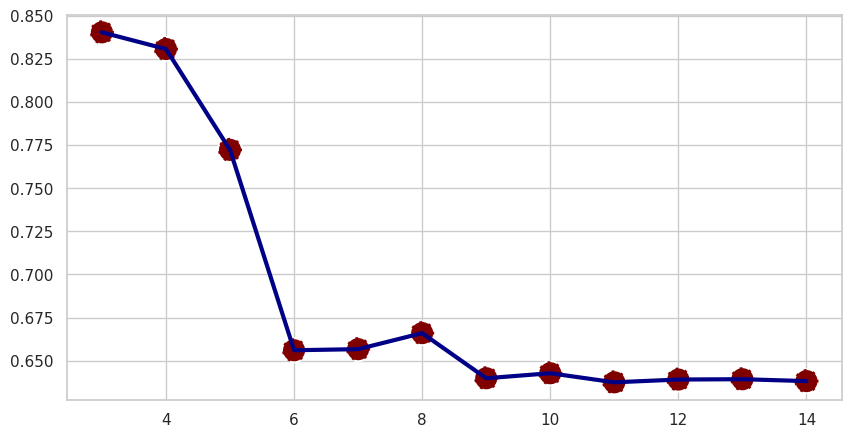

In [ ]:
#Visualisasi Shilouette Score
plt.subplots(1,1,figsize=(10, 5))
sns.lineplot(x=range(3,15), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 3)
sns.scatterplot(x=range(3,15), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

Berdasarkan scatterplot di atas jumlah klaster yang cocok adalah 4 karena menunjukkan nilai paling tinggi.

In [ ]:
# Import model K-Means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) #Set jumlah cluster
kmeans.fit(df_km.values)

KMeans(n_clusters=4, random_state=0)

In [ ]:
# Memasukkan target dan data cluster hasil modelling
df_km['Target'] = y
df_km['Cluster'] = kmeans.labels_

<Axes: xlabel='reported_disaster', ylabel='total_economic'>

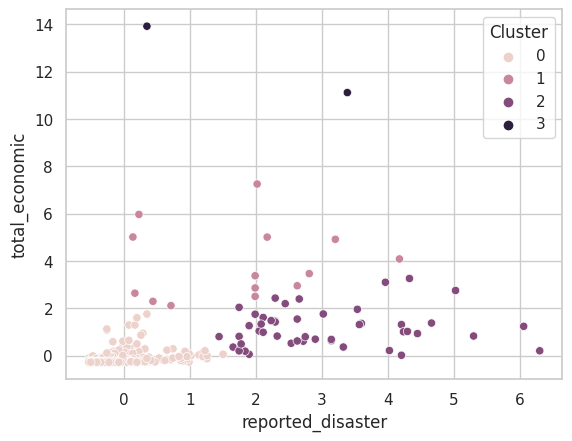

In [ ]:
# Visualisasi hasil modelling
sns.scatterplot(data=df_km, x='reported_disaster', y='total_economic',
                hue='Cluster')

Berdasarkan output di atas Cluster sudah terbagi menjadi 4. Dimana untuk kelaster 0, 1 dan 2 dengan korelasi positif yang cukup kuat karena mengalami peningkatan. Sedangkan untuk cluster 3 hanya memiliki dua titik korelasi saja dengan jarak yang jauh.

<Axes: xlabel='reported_disaster', ylabel='total_economic'>

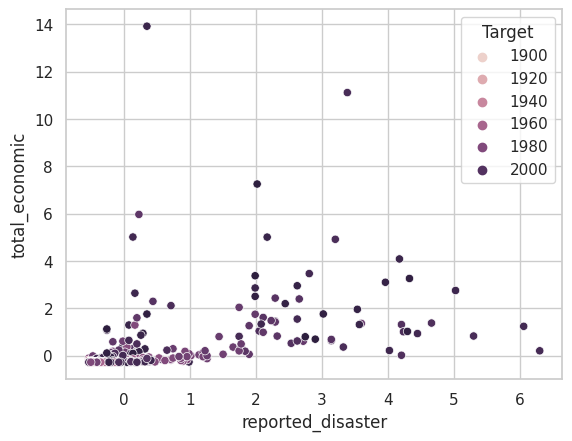

In [ ]:
# Visualisasi sebenarnya
sns.scatterplot(data=df_km, x='reported_disaster', y='total_economic',
                hue='Target')

In [ ]:
# Menunjukkan centroid dari kmeans
kmeans.cluster_centers_

array([[-0.26833819, -0.20941197],
       [ 1.7572472 ,  3.88869551],
       [ 3.01561667,  1.15796319],
       [ 1.86353482, 12.52337526]])

In [ ]:
# Memasukkan hasil clustering ke data
df_new['Cluster'] = kmeans.labels_
df_new

coalesce  coalesce-2  reported_disaster  total_economic  \
119              Drought        1965                  7     127118000.0   
120              Drought        1967                  5     600200000.0   
121              Drought        1968                  7      64000000.0   
122              Drought        1969                 10     215000000.0   
123              Drought        1970                  2       2100000.0   
..                   ...         ...                ...             ...   
823  Extreme temperature        2004                 16             0.0   
824  Mass movement (dry)        2006                  1             0.0   
825      Extreme weather        1943                  3             0.0   
826    Volcanic activity        1988                  5             0.0   
827  Extreme temperature        1981                  2             0.0   

     Cluster  
119        0  
120        0  
121        0  
122        0  
123        0  
..       ...  
823        0  
824        0  
825        0  
826        0  
827        0  

[709 rows x 5 columns]

In [ ]:
# Deskriptif statistik dari modelling kmeans
df_new['fit'] = kmeans.labels_
df_new[['reported_disaster', 'total_economic', 'fit']].groupby('fit').agg(['mean', 'median', 'std'])

reported_disaster                   total_economic                \
                 mean median        std           mean        median   
fit                                                                    
0             9.79845    5.0  11.720066   1.143063e+09  1.900000e+07   
1            76.50000   84.0  41.373998   6.757503e+10  5.998914e+10   
2           117.93750  105.5  39.944859   2.330876e+10  2.097597e+10   
3            80.00000   80.0  70.710678   2.075467e+11  2.075467e+11   

                   
              std  
fit                
0    3.341450e+09  
1    2.496244e+10  
2    1.269925e+10  
3    3.217788e+10

**Deskriptif Statistik**

1.Number of Natural Disaster yang paling tinggi:

* Mean = Claster 3 (117.93)
* Median = Claster 3 (105.5)
* Standar deviasi = Cluster 4 (70.71)

2.Total Economic Damage (US$) yang paling tinggi:
* Mean = Cluster 2 (6.115967e+10)
* Median = Cluster 2 (5.358546e+10)
* Standar deviasi = Cluster 3 (9.605033e+09)

#**Part 3: Data Product Development**

**Link Looker Studio**

https://lookerstudio.google.com/reporting/f3f519b4-bd0e-4f6b-9719-aad0d1091eba/page/4qthD/edit

#**Part 4: Making Impact with Data Science**

**Link Report**

(https://docs.google.com/document/d/1k8Q8YbNxkJBOgYEQDu9NRv7KjBbnR1g8nhsk6LvQung/edit?usp=sharing)